In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import zscore

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [70]:
# Load the dataset
df = pd.read_csv(r'data\spotify_2015_2025_85k.csv', sep=',')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: (85000, 19)
Memory usage: 45.98 MB


In [71]:
# Display first few rows
df.head(10)

track_id                      track_name        artist_name  \
0  TRK-BEBD53DA84E1                 Agent every (0)        Noah Rhodes   
1  TRK-6A32496762D7                   Night respond      Jennifer Cole   
2  TRK-47AA7523463E          Future choice whatever      Brandon Davis   
3  TRK-25ADA22E3B06             Bad fall pick those        Corey Jones   
4  TRK-9245F2AD996A                         Husband          Mark Diaz   
5  TRK-A249E0859674                       Move each     Devin Schaefer   
6  TRK-80176DE44638                      Husband at     Latoya Robbins   
7  TRK-75503F2042FD  Much section investment on gun  Brenda Snyder PhD   
8  TRK-5BB824DBF141                       His other         David Tran   
9  TRK-3EB4332CA819                        Specific      Ashley Graham   

          album_name release_date      genre  duration_ms  popularity  \
0  Beautiful instead   2016-04-01        Pop       234194          55   
1              Table   2022-04-15      Metal       375706          45   
2      Page southern   2016-02-23       Rock       289191          55   
3             Spring   2015-10-12        Pop       209484          51   
4        Great prove   2022-07-08      Indie       127435          39   
5        Detail food   2018-01-01       Rock       200615          36   
6            Reality   2023-05-10    Country       372579          38   
7              Claim   2015-09-18  Classical       290078          70   
8           Response   2019-11-16    Hip-Hop       327881          66   
9       About reveal   2021-01-18    Country        90299          40   

   danceability  energy  key  loudness  mode  instrumentalness   tempo  \
0          0.15    0.74    9    -32.22     0             0.436   73.12   
1          0.44    0.46    0    -14.02     0             0.223  157.74   
2          0.62    0.80    8    -48.26     1             0.584   71.03   
3          0.78    0.98    1    -34.47     1             0.684  149.00   
4          0.74    0.18   10    -17.84     0             0.304  155.85   
5          0.91    0.57    3    -19.61     1             0.574  183.86   
6          0.89    0.41    2    -27.49     0             0.175  165.81   
7          0.61    0.47    8     -8.52     0             0.201  155.24   
8          0.73    0.96    8     -5.72     1             0.610  177.83   
9          0.61    0.49    5     -7.55     1             0.089   93.52   

   stream_count         country  explicit            label  
0         13000          Brazil         0  Universal Music  
1          1000          France         1   Island Records  
2          1000         Germany         1    XL Recordings  
3          1000          France         0     Warner Music  
4          2000   United States         0      Independent  
5          1000       Australia         0     Warner Music  
6          1000  United Kingdom         0     Warner Music  
7         21000  United Kingdom         0   Island Records  
8          6000           Japan         0      Independent  
9          1000          Brazil         1       Sony Music

In [72]:
# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
df.info()

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000

In [73]:
# Display column names and data types
print("\nColumn Names and Types:")
print("-" * 60)
for col in df.columns:
    print(f"{col:20s} : {str(df[col].dtype):15s}")


Column Names and Types:
------------------------------------------------------------
track_id             : object         
track_name           : object         
artist_name          : object         
album_name           : object         
release_date         : object         
genre                : object         
duration_ms          : int64          
popularity           : int64          
danceability         : float64        
energy               : float64        
key                  : int64          
loudness             : float64        
mode                 : int64          
instrumentalness     : float64        
tempo                : float64        
stream_count         : int64          
country              : object         
explicit             : int64          
label                : object         


In [74]:
# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


MISSING VALUES ANALYSIS
            Missing Count  Percentage
album_name             46    0.054118
track_name             21    0.024706


In [75]:
# Check for duplicate rows
print("\n" + "=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")


DUPLICATE ROWS ANALYSIS
Total duplicate rows: 0
Percentage of duplicates: 0.00%


In [76]:
# Statistical summary for numerical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].describe()


STATISTICAL SUMMARY - NUMERICAL COLUMNS


duration_ms    popularity  danceability        energy           key  \
count   85000.000000  85000.000000  85000.000000  85000.000000  85000.000000   
mean   254913.824294     48.162894      0.520710      0.505412      5.515988   
std     95300.233207     14.829752      0.270799      0.279774      3.454069   
min     90004.000000      0.000000      0.050000      0.020000      0.000000   
25%    171871.500000     38.000000      0.290000      0.260000      2.750000   
50%    254920.500000     47.000000      0.520000      0.500000      6.000000   
75%    337203.250000     57.000000      0.760000      0.750000      9.000000   
max    420000.000000    100.000000      0.990000      0.990000     11.000000   

           loudness          mode  instrumentalness         tempo  \
count  85000.000000  85000.000000      85000.000000  85000.000000   
mean     -27.999300      0.500141          0.399781    129.948351   
std       15.598365      0.500003          0.231470     40.444321   
min      -55.000000      0.000000          0.000000     60.000000   
25%      -41.470000      0.000000          0.198000     94.840000   
50%      -27.970000      1.000000          0.399000    129.990000   
75%      -14.500000      1.000000          0.600000    165.030000   
max       -1.000000      1.000000          0.800000    200.000000   

       stream_count      explicit  
count  8.500000e+04  85000.000000  
mean   2.143547e+05      0.201329  
std    1.680637e+06      0.400996  
min    1.000000e+03      0.000000  
25%    1.000000e+03      0.000000  
50%    2.000000e+03      0.000000  
75%    9.000000e+03      0.000000  
max    2.000000e+07      1.000000

In [115]:
df[df['stream_count'] == df['stream_count'].max()]

track_id                    track_name     artist_name  \
142    TRK-2A0726803D7D   Good anything manager think   Julie Herrera   
1157   TRK-4D16B95CDE5B                            Of     David Rivas   
1180   TRK-8D72E8978349                         Throw   Brian Nichols   
1317   TRK-B453924B9BD9                         Space   Joseph Duncan   
1481   TRK-69BC500A0237                          Upon      Monica Kim   
...                 ...                           ...             ...   
83399  TRK-40BA7F595BBC           Source film program   Teresa Haynes   
84329  TRK-9923D42A1C6B                 Recognize fly    Allison Hale   
84455  TRK-506C4FAFB27C                Discussion act    Kevin Hurley   
84911  TRK-413ACBA61B65  Under let back piece account     Jerome Shaw   
84920  TRK-475674BAF15F                          Read  Bryan Trujillo   

            album_name release_date    genre  duration_ms  popularity  \
142             Lawyer   2020-12-06  Hip-Hop       206753         100   
1157        Two lawyer   2023-08-17     Rock       359579         100   
1180              Step   2017-08-10      EDM       339094          93   
1317             Enter   2016-02-13  Hip-Hop       134321         100   
1481   Shake statement   2015-10-01      R&B       239443         100   
...                ...          ...      ...          ...         ...   
83399             Main   2018-08-03     Folk       307865          72   
84329      Get meeting   2024-04-10     Jazz       383060          96   
84455        Scientist   2018-03-15     Folk       308552          86   
84911          Receive   2022-09-11      R&B       345617         100   
84920   Response order   2021-10-05  Country       118871          89   

       danceability  energy  key  loudness  mode  instrumentalness   tempo  \
142            0.97    0.47    6    -26.28     0             0.575   94.65   
1157           0.17    0.22   11    -12.20     0             0.645   74.05   
1180           0.37    0.97    4    -37.65     0             0.035  116.09   
1317           0.13    0.07    8    -52.73     1             0.425  197.55   
1481           0.66    0.04    1    -52.31     0             0.185  140.49   
...             ...     ...  ...       ...   ...               ...     ...   
83399          0.81    0.94    8    -25.23     1             0.112  161.60   
84329          0.92    0.94    4    -21.39     1             0.449   80.02   
84455          0.21    0.76    5     -1.55     0             0.756  129.50   
84911          0.50    0.14    3    -45.66     0             0.366  170.55   
84920          0.40    0.02   10    -46.93     0             0.172   67.23   

       stream_count        country  explicit           label  
142        20000000         France         0    Warner Music  
1157       20000000         Canada         1  Island Records  
1180       20000000  United States         0    Warner Music  
1317       20000000          Japan         0             EMI  
1481       20000000         Brazil         0   XL Recordings  
...             ...            ...       ...             ...  
83399      20000000          India         1             EMI  
84329      20000000      Australia         0             EMI  
84455      20000000          India         0      Sony Music  
84911      20000000  United States         0        Columbia  
84920      20000000         Brazil         0             EMI  

[458 rows x 19 columns]

In [77]:
# Statistical summary for categorical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


STATISTICAL SUMMARY - CATEGORICAL COLUMNS

track_id:
  Unique values: 85000
  Top 5 values:
track_id
TRK-BEBD53DA84E1    1
TRK-1DC278452355    1
TRK-D2AFBA0CAFB5    1
TRK-03EF4D7424EB    1
TRK-64C447ECE995    1
Name: count, dtype: int64

track_name:
  Unique values: 68951
  Top 5 values:
track_name
Stand       32
Ten         30
A           29
Fine        29
Shoulder    29
Name: count, dtype: int64

artist_name:
  Unique values: 62391
  Top 5 values:
artist_name
Michael Smith          44
Michael Johnson        42
David Smith            33
Christopher Johnson    28
David Johnson          27
Name: count, dtype: int64

album_name:
  Unique values: 43170
  Top 5 values:
album_name
Visit     64
Theory    64
Drop      61
Simply    59
Movie     59
Name: count, dtype: int64

release_date:
  Unique values: 4018
  Top 5 values:
release_date
2018-01-03    40
2015-06-03    38
2018-01-02    38
2023-12-27    37
2025-12-19    36
Name: count, dtype: int64

genre:
  Unique values: 12
  Top 5 values:
ge

# DATA CLEANING

In [78]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# Handle missing values in track_name and album_name
df_clean['track_name'] = df_clean['track_name'].fillna('Unknown')
df_clean['album_name'] = df_clean['album_name'].fillna('Unknown')

print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset shape: (85000, 19)
After removing duplicates: (85000, 19)
Final cleaned dataset shape: (85000, 19)
Rows removed: 0


In [ ]:
# Convert release_date to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')

# Extract year, month, quarter, week, and day of week from release_date
df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month
df_clean['release_quarter'] = df_clean['release_date'].dt.quarter
df_clean['release_week'] = df_clean['release_date'].dt.isocalendar().week
df_clean['release_day_of_week'] = df_clean['release_date'].dt.day_name()

# Convert duration_ms to minutes for better readability
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

print("Date conversion completed!")
print(f"Date range: {df_clean['release_date'].min()} to {df_clean['release_date'].max()}")
print(f"\nNew date features added:")
print(f"  - release_quarter: {df_clean['release_quarter'].nunique()} unique quarters")
print(f"  - release_week: {df_clean['release_week'].nunique()} unique weeks")
print(f"  - release_day_of_week: {df_clean['release_day_of_week'].nunique()} unique days")

Date conversion completed!
Date range: 2015-01-01 00:00:00 to 2025-12-31 00:00:00


In [81]:
# Detect and handle outliers using IQR method for numerical columns
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

outlier_cols = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 
                'duration_ms', 'stream_count', 'instrumentalness']

outlier_info = {}
for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers)/len(df_clean))*100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    print(f"{col:20s}: {len(outliers):6d} outliers ({len(outliers)/len(df_clean)*100:5.2f}%)")

# Note: We'll keep outliers for analysis but be aware of them

OUTLIER DETECTION
popularity          :   1806 outliers ( 2.12%)
danceability        :      0 outliers ( 0.00%)
energy              :      0 outliers ( 0.00%)
loudness            :      0 outliers ( 0.00%)
tempo               :      0 outliers ( 0.00%)
duration_ms         :      0 outliers ( 0.00%)
stream_count        :  14160 outliers (16.66%)
instrumentalness    :      0 outliers ( 0.00%)


# EXPLORATORY DATA ANALYSIS (EDA)

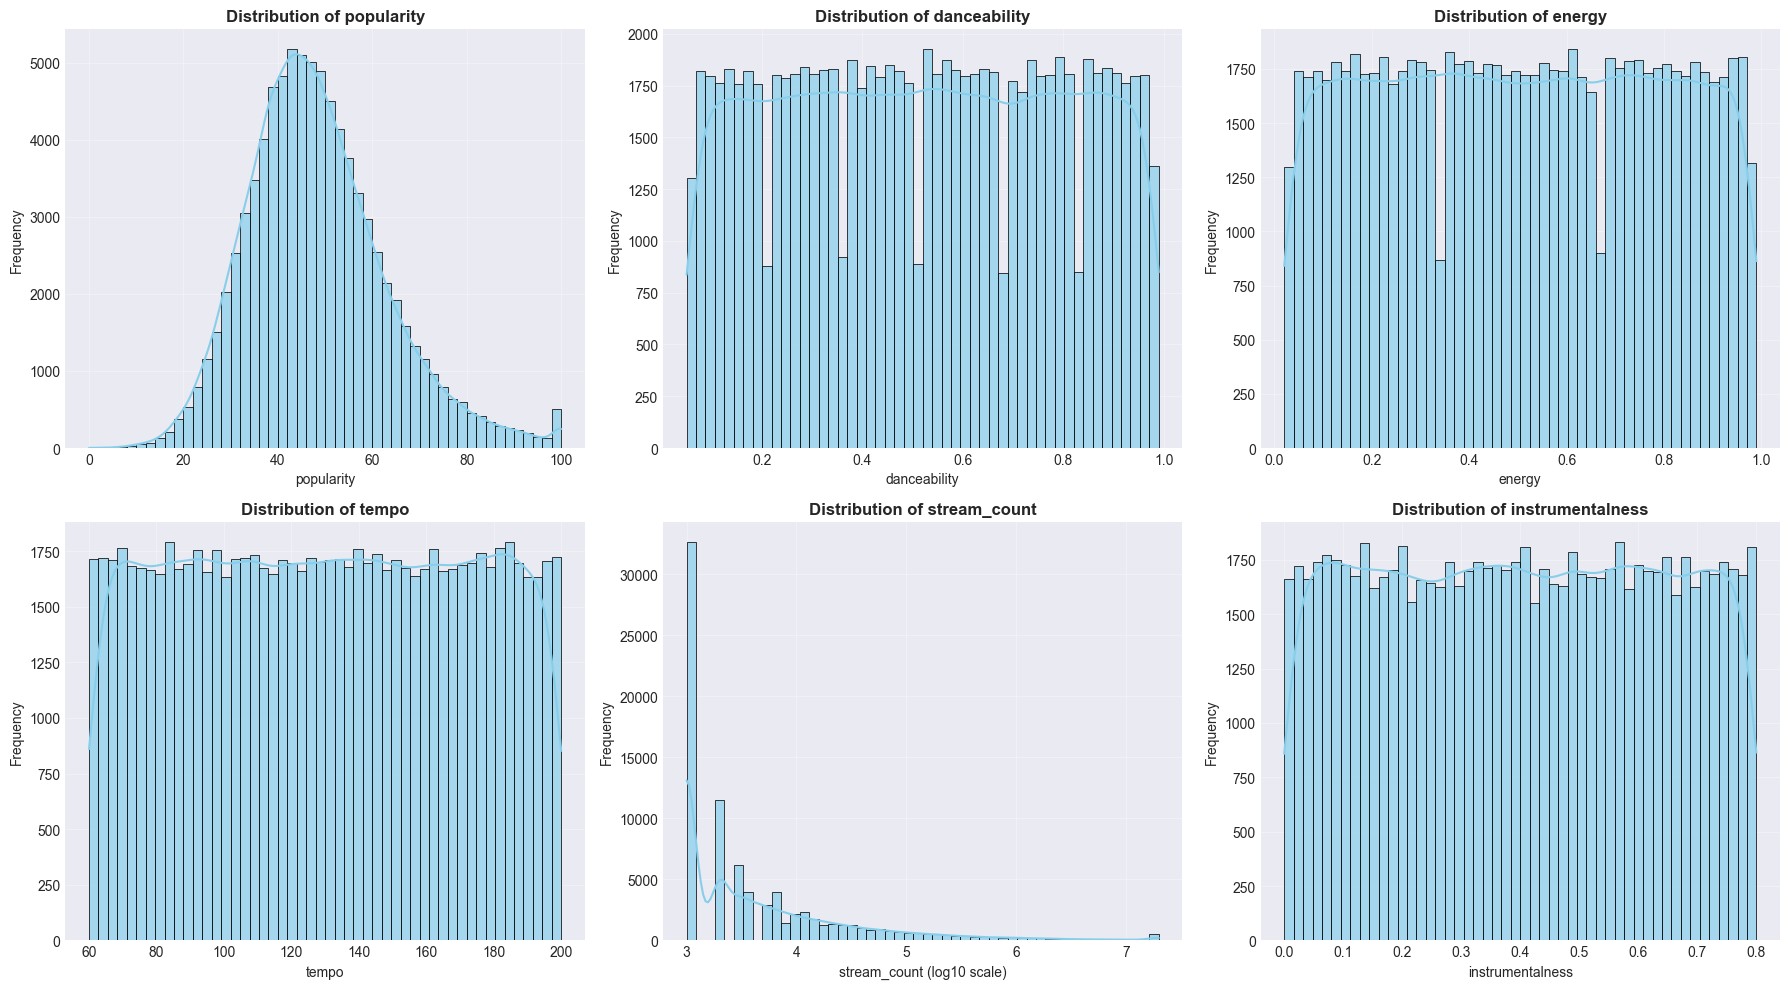

In [125]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

numerical_features = ['popularity', 'danceability', 'energy', 
                     'tempo', 'stream_count', 'instrumentalness']

for idx, feature in enumerate(numerical_features):
    data = df_clean[feature].dropna()
    
    # Use log scale for stream_count
    if feature == 'stream_count':
        data = np.log10(data[data > 0])  # Log10 transformation, exclude zeros
        sns.histplot(data=data, bins=50, kde=True, ax=axes[idx], edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_xlabel(f'{feature} (log10 scale)')
    else:
        sns.histplot(data=data, bins=50, kde=True, ax=axes[idx], edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_xlabel(feature)
    
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

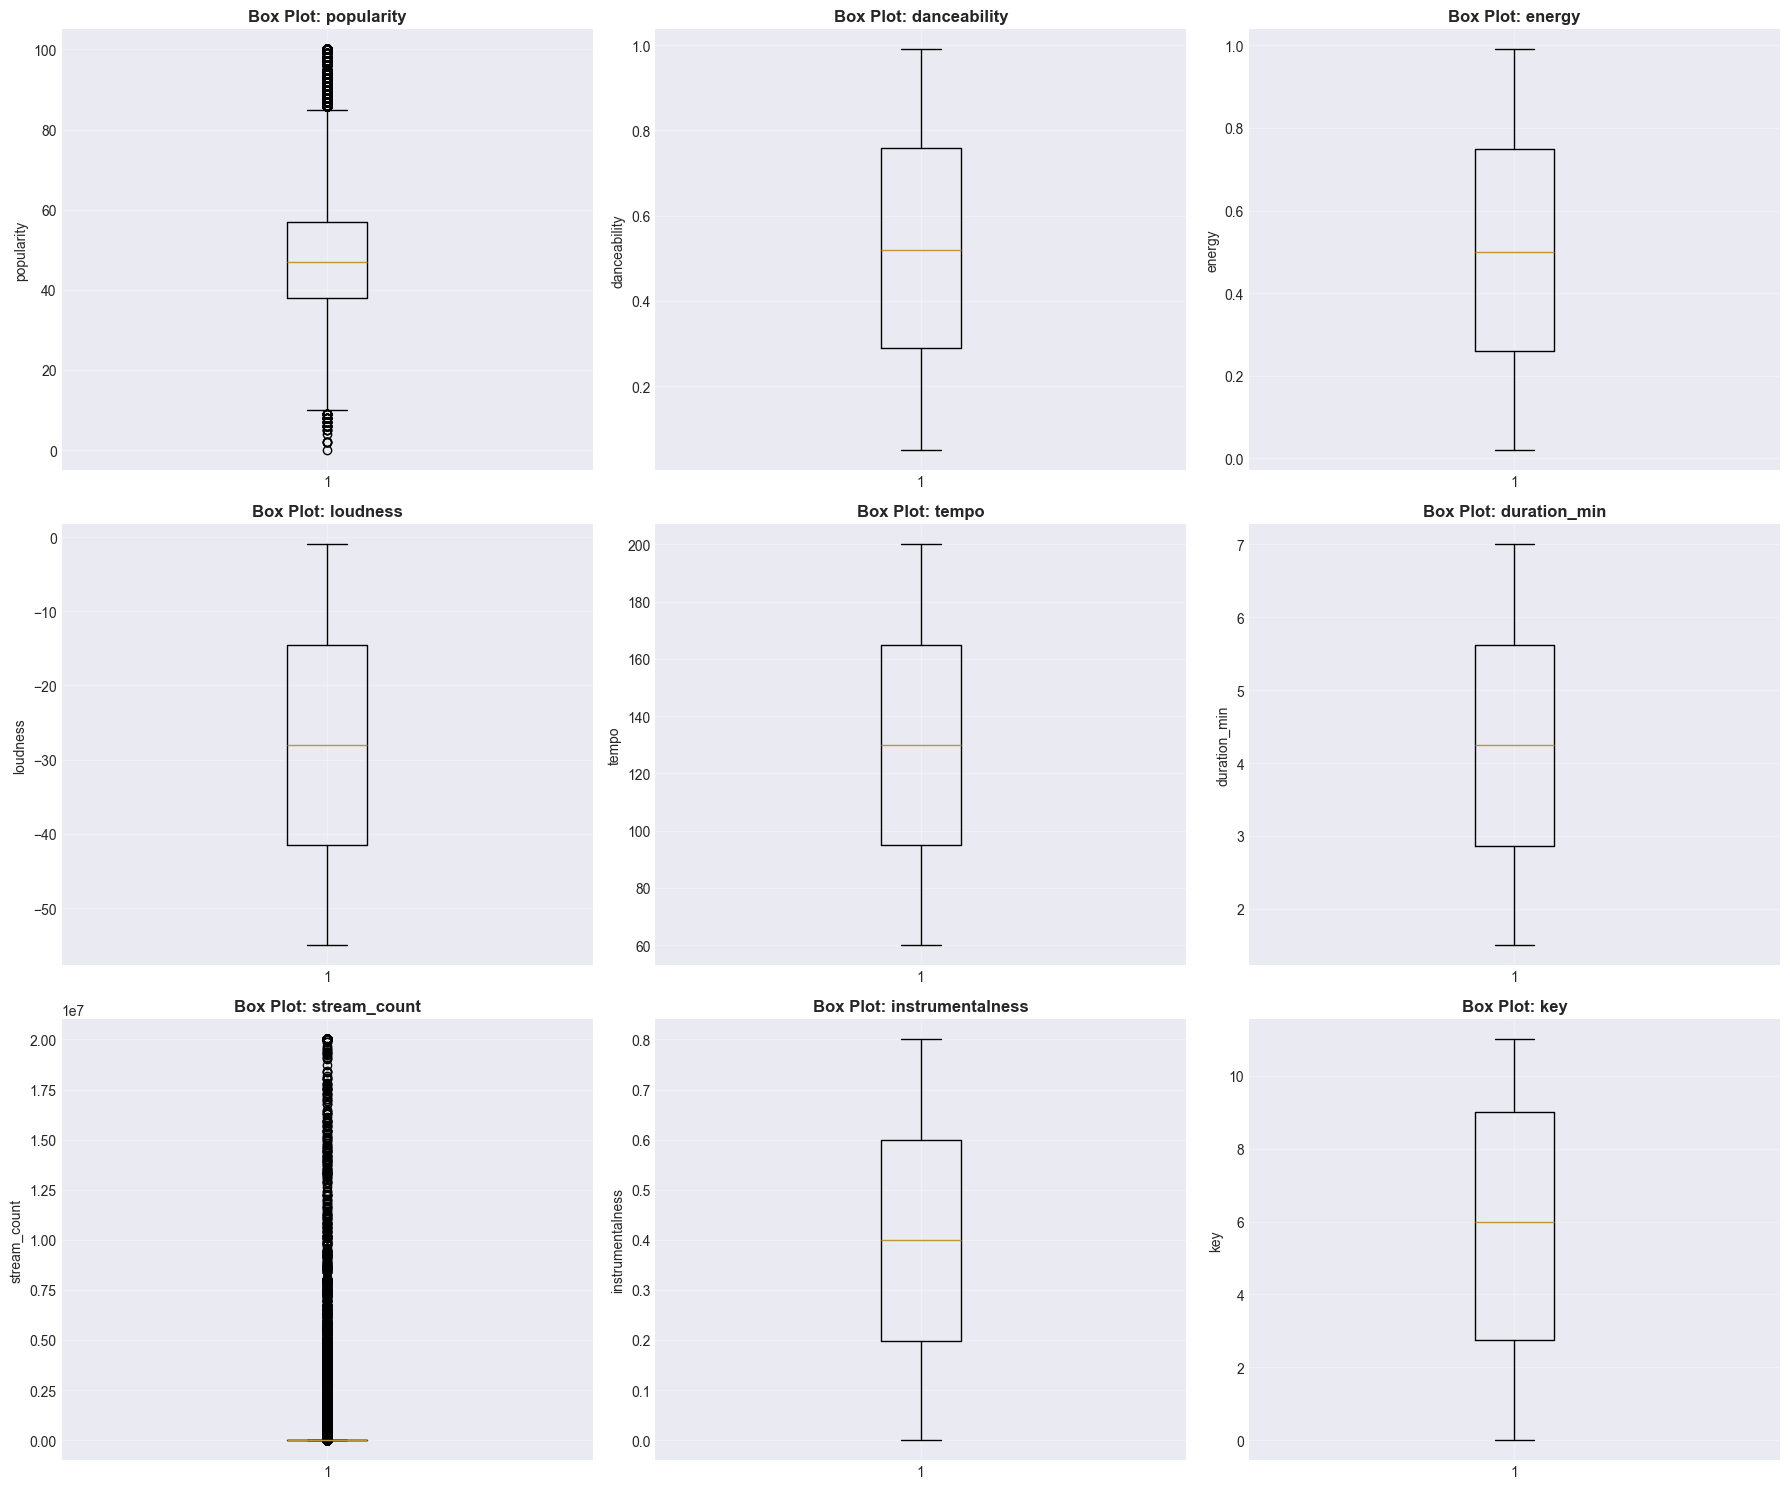

In [83]:
# Box plots for numerical features to identify outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    axes[idx].boxplot(df_clean[feature].dropna(), vert=True)
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

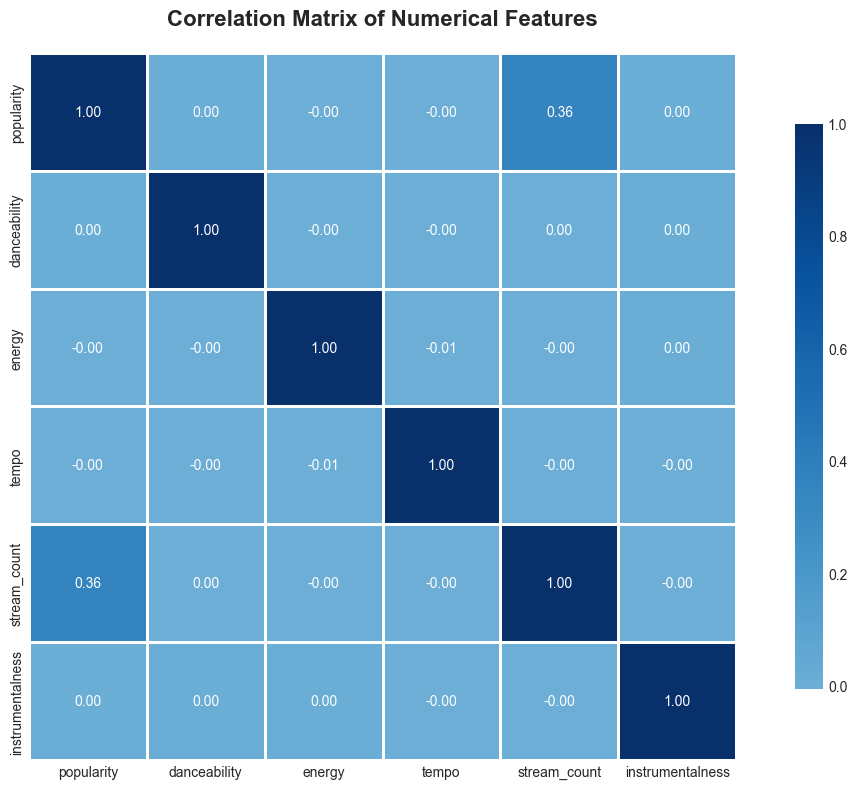

In [140]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

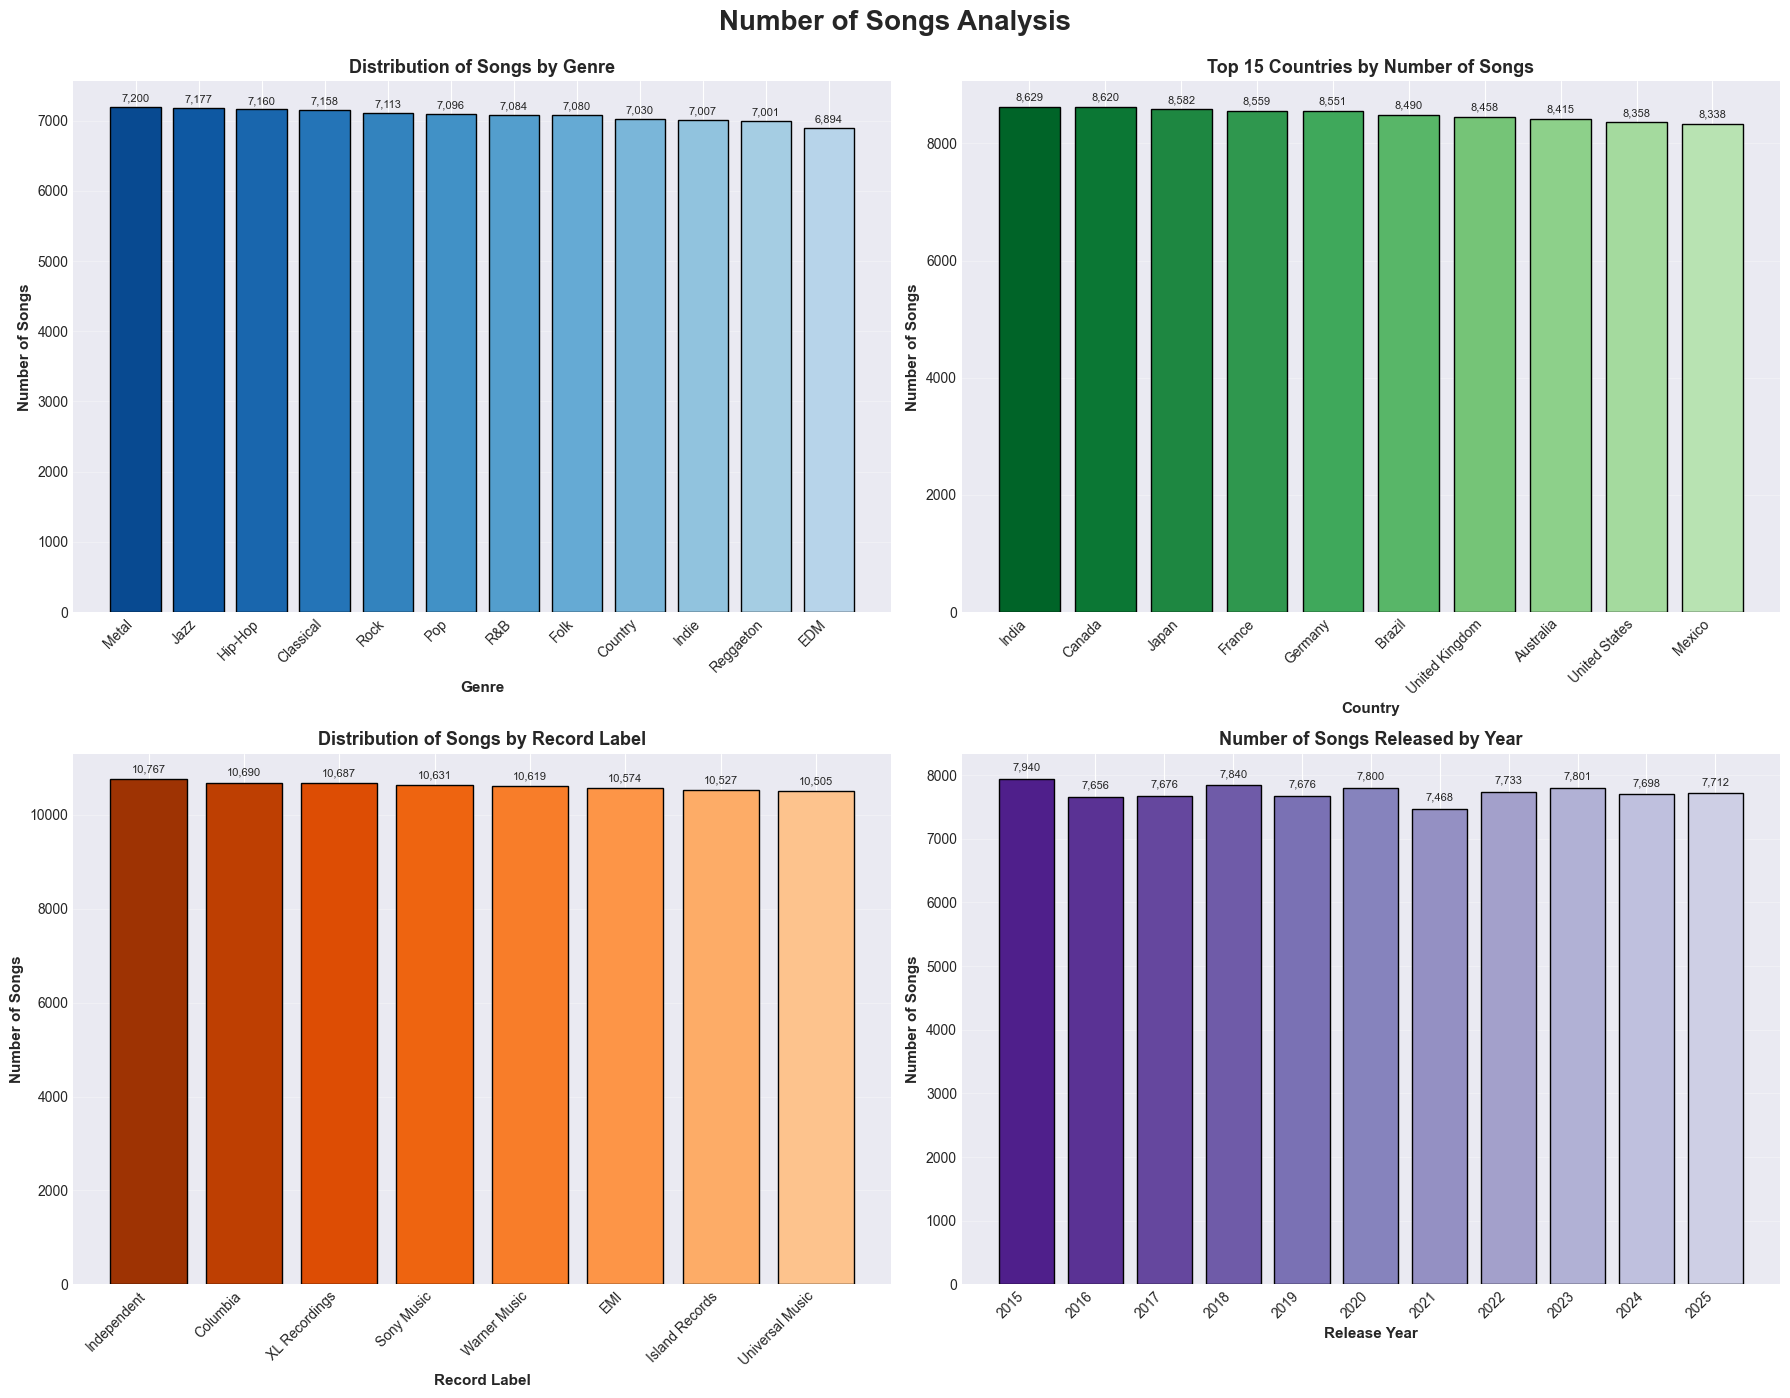

In [161]:
# Number of Songs Analysis - Combined Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Number of Songs Analysis', fontsize=20, fontweight='bold', y=0.995)

# 1. Genre distribution (Top Left)
genre_counts = df_clean['genre'].value_counts()
colors_genre = plt.cm.Blues(np.linspace(0.9, 0.3, len(genre_counts)))
bars1 = axes[0, 0].bar(range(len(genre_counts)), genre_counts.values, color=colors_genre, edgecolor='black')
axes[0, 0].set_xlabel('Genre', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Songs by Genre', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(range(len(genre_counts)))
axes[0, 0].set_xticklabels(genre_counts.index, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars1, genre_counts.values)):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

# 2. Country distribution (Top Right)
country_counts = df_clean['country'].value_counts().head(15)
colors_country = plt.cm.Greens(np.linspace(0.9, 0.3, len(country_counts)))
bars2 = axes[0, 1].bar(range(len(country_counts)), country_counts.values, color=colors_country, edgecolor='black')
axes[0, 1].set_xlabel('Country', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Top 15 Countries by Number of Songs', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(range(len(country_counts)))
axes[0, 1].set_xticklabels(country_counts.index, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars2, country_counts.values)):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 75,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

# 3. Label (Record Label) distribution (Bottom Left)
label_counts = df_clean['label'].value_counts()
colors_label = plt.cm.Oranges(np.linspace(0.9, 0.3, len(label_counts)))
bars3 = axes[1, 0].bar(range(len(label_counts)), label_counts.values, color=colors_label, edgecolor='black')
axes[1, 0].set_xlabel('Record Label', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Songs by Record Label', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(range(len(label_counts)))
axes[1, 0].set_xticklabels(label_counts.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars3, label_counts.values)):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

# 4. Songs released by year (Bottom Right) - Converted to bar chart
year_counts = df_clean['release_year'].value_counts().sort_index()
colors_year = plt.cm.Purples(np.linspace(0.9, 0.3, len(year_counts)))
bars4 = axes[1, 1].bar(range(len(year_counts)), year_counts.values, color=colors_year, edgecolor='black')
axes[1, 1].set_xlabel('Release Year', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Number of Songs Released by Year', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(range(len(year_counts)))
axes[1, 1].set_xticklabels(year_counts.index, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars4, year_counts.values)):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

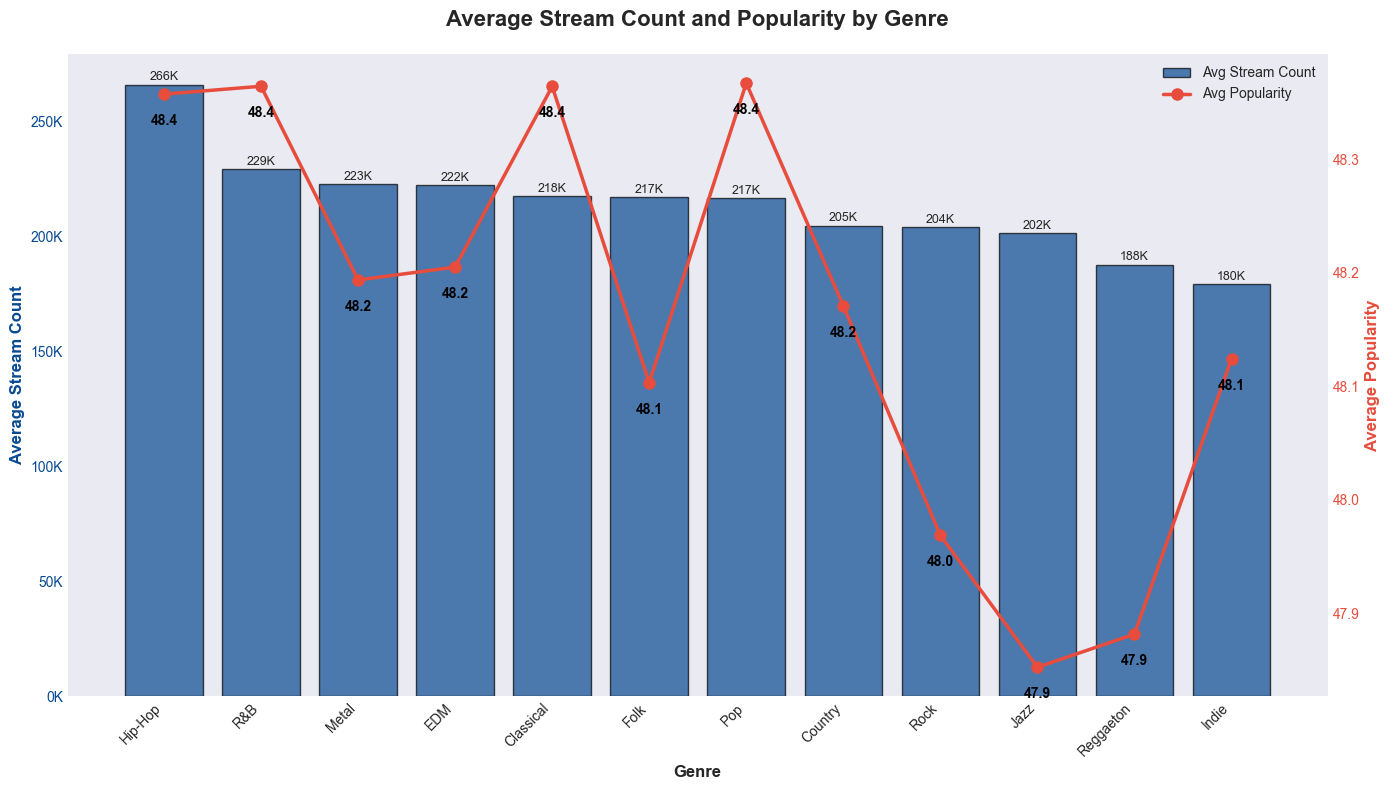

In [194]:
# Dual Axis Chart: Average Stream Count (Bars) and Average Popularity (Line) by Genre
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get data sorted by stream count (descending)
genre_streams = df_clean.groupby('genre')['stream_count'].mean().sort_values(ascending=False)
genre_popularity = df_clean.groupby('genre')['popularity'].mean()
# Reorder popularity to match stream count order
genre_popularity = genre_popularity.reindex(genre_streams.index)

# Create x positions
x_pos = range(len(genre_streams))

# Left Y-axis: Stream Count (Bars)
color_bars = '#084A91'  # Solid blue
bars = ax1.bar(x_pos, genre_streams.values, color=color_bars, edgecolor='black', alpha=0.7, label='Avg Stream Count')
ax1.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Stream Count', fontsize=12, fontweight='bold', color=color_bars)
ax1.tick_params(axis='y', labelcolor=color_bars)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(genre_streams.index, rotation=45, ha='right')
ax1.grid(False)  # Remove grid lines

# Format y-axis to show values in thousands/millions
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, genre_streams.values)):
    label = f'{val/1000:.0f}K' if val < 1000000 else f'{val/1000000:.1f}M'
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             label, ha='center', va='bottom', fontsize=9)

# Right Y-axis: Popularity (Line)
ax2 = ax1.twinx()
color_line = '#e74c3c'  # Solid red
line = ax2.plot(x_pos, genre_popularity.values, color=color_line, marker='o', 
                linewidth=2.5, markersize=8, label='Avg Popularity')
ax2.set_ylabel('Average Popularity', fontsize=12, fontweight='bold', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.grid(False)  # Remove grid lines

# Add value labels on line points - positioned just above markers, bold and black
for i, (x, val) in enumerate(zip(x_pos, genre_popularity.values)):
    ax2.text(x, val - 0.03, f'{val:.1f}', ha='center', va='bottom', 
             fontsize=10, color='black', fontweight='bold')

# Title
plt.title('Average Stream Count and Popularity by Genre', fontsize=16, fontweight='bold', pad=20)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

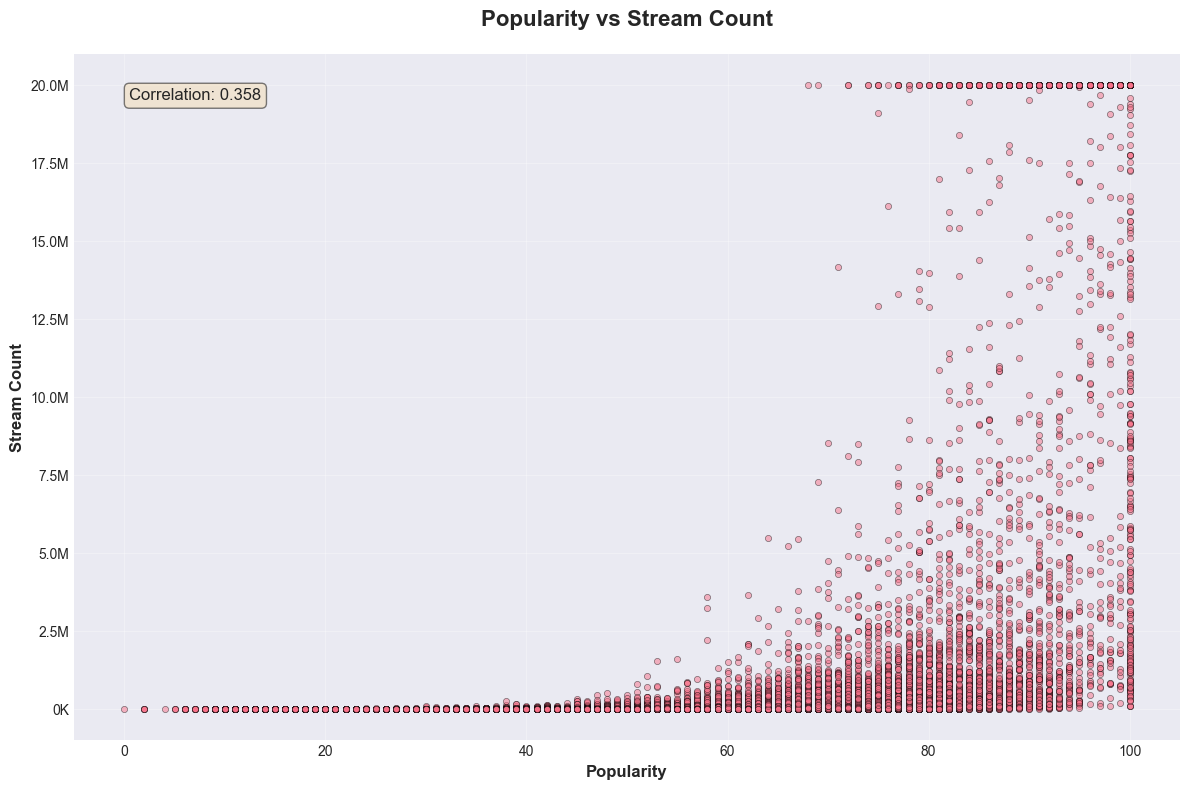

In [91]:
# Relationship between popularity and stream_count
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['popularity'], df_clean['stream_count'], alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
plt.xlabel('Popularity', fontsize=12, fontweight='bold')
plt.ylabel('Stream Count', fontsize=12, fontweight='bold')
plt.title('Popularity vs Stream Count', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['popularity'].corr(df_clean['stream_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

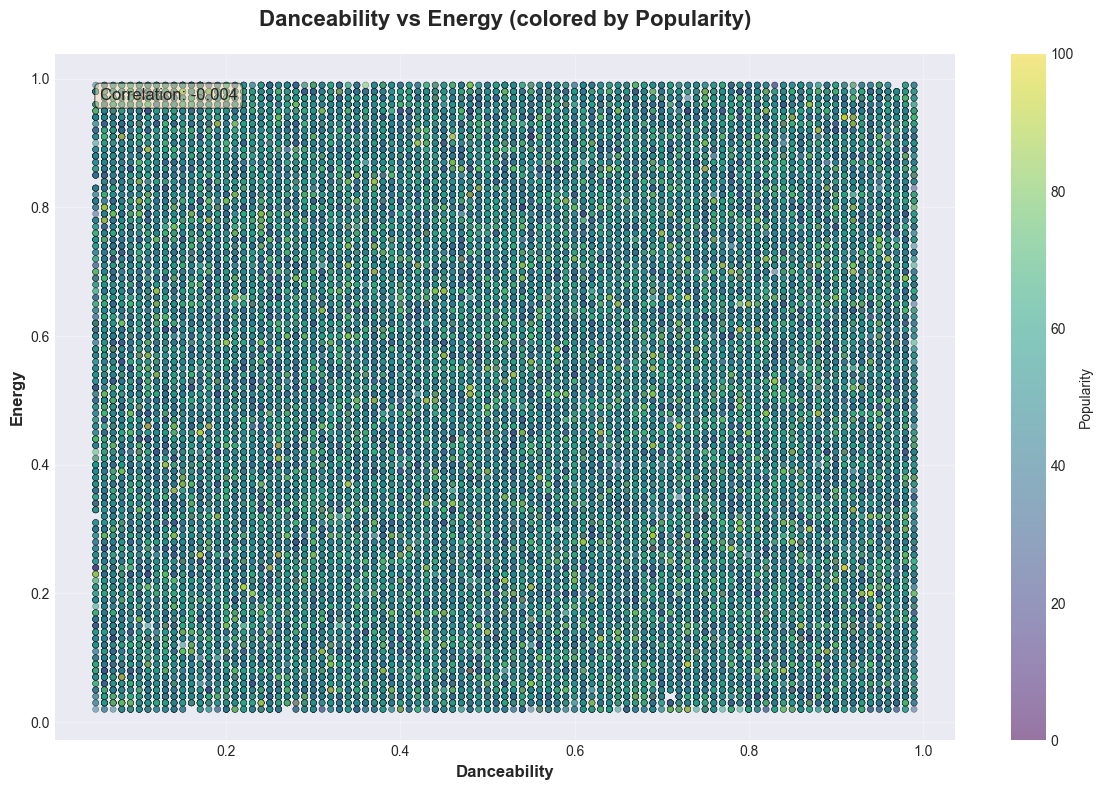

In [92]:
# Relationship between danceability and energy
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['danceability'], df_clean['energy'], alpha=0.5, s=20, 
            c=df_clean['popularity'], cmap='viridis', edgecolors='black', linewidth=0.3)
plt.colorbar(label='Popularity')
plt.xlabel('Danceability', fontsize=12, fontweight='bold')
plt.ylabel('Energy', fontsize=12, fontweight='bold')
plt.title('Danceability vs Energy (colored by Popularity)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['danceability'].corr(df_clean['energy'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

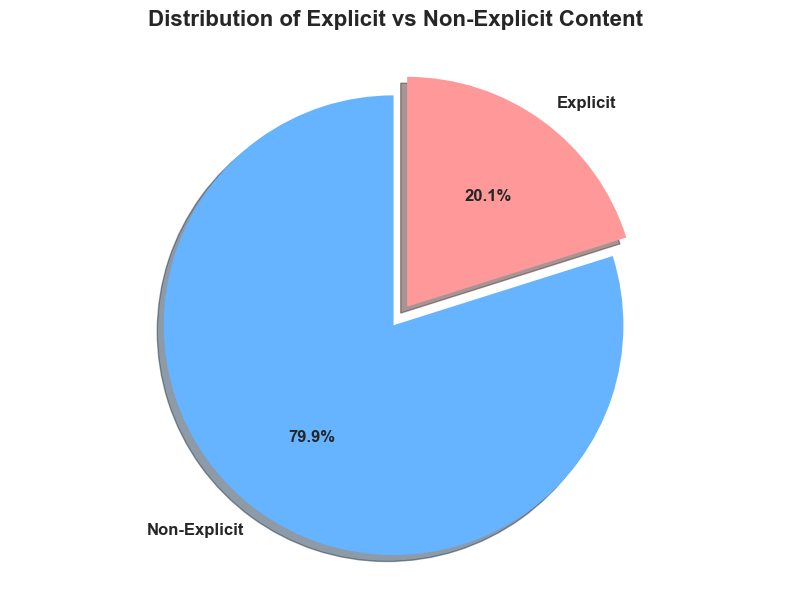


Explicit songs: 17,113 (20.13%)
Non-explicit songs: 67,887 (79.87%)


In [195]:
# Explicit content analysis
plt.figure(figsize=(8, 6))
explicit_counts = df_clean['explicit'].value_counts()
labels = ['Non-Explicit', 'Explicit']
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

plt.pie(explicit_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Explicit vs Non-Explicit Content', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nExplicit songs: {explicit_counts[1]:,} ({(explicit_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Non-explicit songs: {explicit_counts[0]:,} ({(explicit_counts[0]/len(df_clean)*100):.2f}%)")

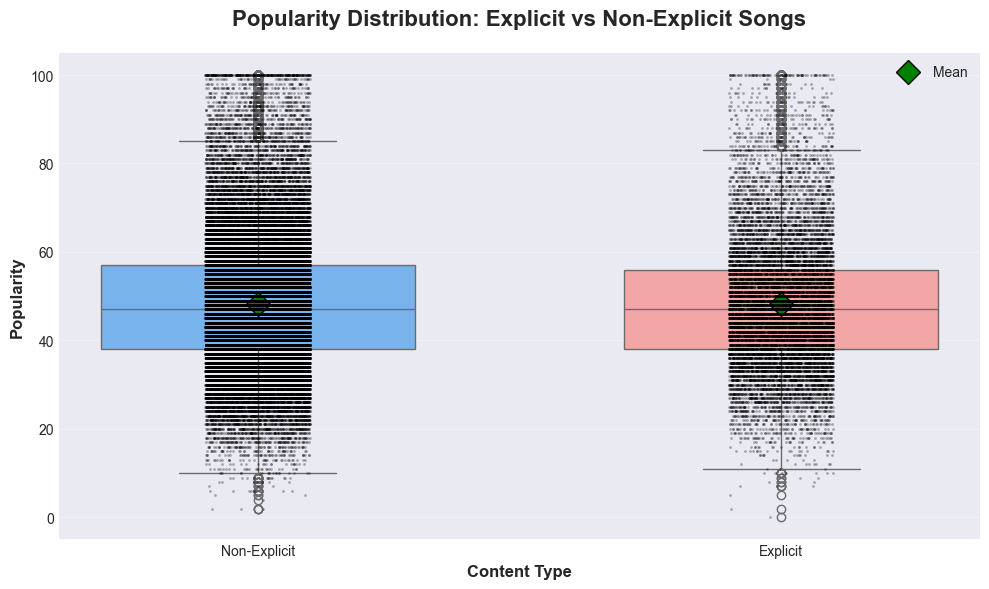


OPTION 2: Violin Plot (Alternative Visualization)


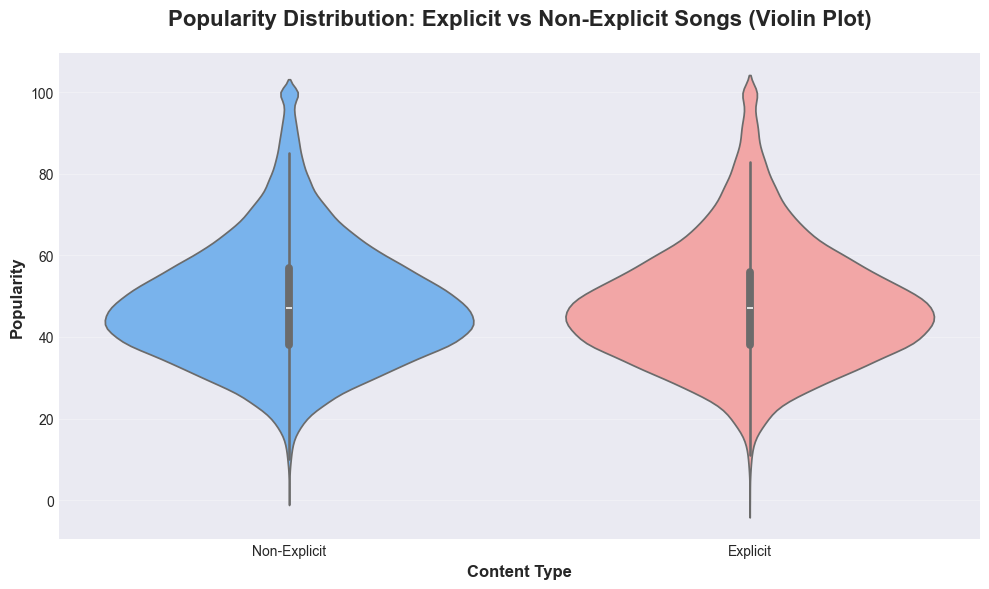


STATISTICAL TEST RESULTS
T-statistic: -0.2634
P-value: 0.7923
Mean Popularity - Explicit Songs: 48.14
Mean Popularity - Non-Explicit Songs: 48.17
Difference: 0.03

INTERPRETATION (Easy-to-Understand Explanation)

We compared the popularity scores between explicit and non-explicit songs to see if 
there's a meaningful difference between them.

WHAT WE FOUND:
• The average popularity of explicit songs is 48.14 out of 100.
• The average popularity of non-explicit songs is 48.17 out of 100.
• The difference between them is only 0.03 points, which is very small.

WHAT THIS MEANS:
The p-value of 0.7923 tells us how confident we can be about our findings. 
Think of it like this:
• If the p-value is less than 0.05, we'd say "Yes, there IS a real difference!"
• If the p-value is 0.05 or higher, we'd say "No, there's NO meaningful difference."

In our case, the p-value is 0.7923, which is much higher than 0.05. This means:

✓ There is NO statistically significant difference in popularity betwee

In [196]:
# Popularity comparison: Explicit vs Non-Explicit
# OPTION 1: Seaborn Box Plot (Recommended)
explicit_pop = df_clean[df_clean['explicit'] == 1]['popularity']
non_explicit_pop = df_clean[df_clean['explicit'] == 0]['popularity']

# Prepare data for seaborn
df_plot = pd.DataFrame({
    'Popularity': pd.concat([non_explicit_pop, explicit_pop]),
    'Content Type': ['Non-Explicit'] * len(non_explicit_pop) + ['Explicit'] * len(explicit_pop)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='Content Type', y='Popularity', 
            palette=['#66b3ff', '#ff9999'], width=0.6)
sns.stripplot(data=df_plot, x='Content Type', y='Popularity', 
              color='black', alpha=0.3, size=2, jitter=True)

# Add mean markers
mean_non_explicit = non_explicit_pop.mean()
mean_explicit = explicit_pop.mean()
plt.plot(0, mean_non_explicit, 'D', color='green', markersize=12, 
         label='Mean', markeredgecolor='black', markeredgewidth=1)
plt.plot(1, mean_explicit, 'D', color='green', markersize=12, 
         markeredgecolor='black', markeredgewidth=1)

plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.xlabel('Content Type', fontsize=12, fontweight='bold')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Songs', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OPTION 2: Violin Plot (Alternative Visualization)")
print("="*70)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_plot, x='Content Type', y='Popularity', 
               palette=['#66b3ff', '#ff9999'], inner='box')
plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.xlabel('Content Type', fontsize=12, fontweight='bold')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Songs (Violin Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(explicit_pop, non_explicit_pop)

print("\n" + "="*70)
print("STATISTICAL TEST RESULTS")
print("="*70)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean Popularity - Explicit Songs: {explicit_pop.mean():.2f}")
print(f"Mean Popularity - Non-Explicit Songs: {non_explicit_pop.mean():.2f}")
print(f"Difference: {abs(explicit_pop.mean() - non_explicit_pop.mean()):.2f}")

print("\n" + "="*70)
print("INTERPRETATION (Easy-to-Understand Explanation)")
print("="*70)
print("""
We compared the popularity scores between explicit and non-explicit songs to see if 
there's a meaningful difference between them.

WHAT WE FOUND:
• The average popularity of explicit songs is {:.2f} out of 100.
• The average popularity of non-explicit songs is {:.2f} out of 100.
• The difference between them is only {:.2f} points, which is very small.

WHAT THIS MEANS:
The p-value of {:.4f} tells us how confident we can be about our findings. 
Think of it like this:
• If the p-value is less than 0.05, we'd say "Yes, there IS a real difference!"
• If the p-value is 0.05 or higher, we'd say "No, there's NO meaningful difference."

In our case, the p-value is {:.4f}, which is much higher than 0.05. This means:

✓ There is NO statistically significant difference in popularity between 
  explicit and non-explicit songs.
  
✓ The tiny difference we see ({:.2f} points) is likely just due to random 
  variation in the data, not because one type is actually more popular than 
  the other.

✓ In simple terms: Whether a song has explicit content or not doesn't appear 
  to make a meaningful difference in how popular it becomes on Spotify.

BOTTOM LINE:
Based on this analysis, we cannot say that explicit songs are more or less 
popular than non-explicit songs. They perform about the same in terms of 
popularity scores.
""".format(explicit_pop.mean(), non_explicit_pop.mean(), 
           abs(explicit_pop.mean() - non_explicit_pop.mean()), 
           p_value, p_value, abs(explicit_pop.mean() - non_explicit_pop.mean())))

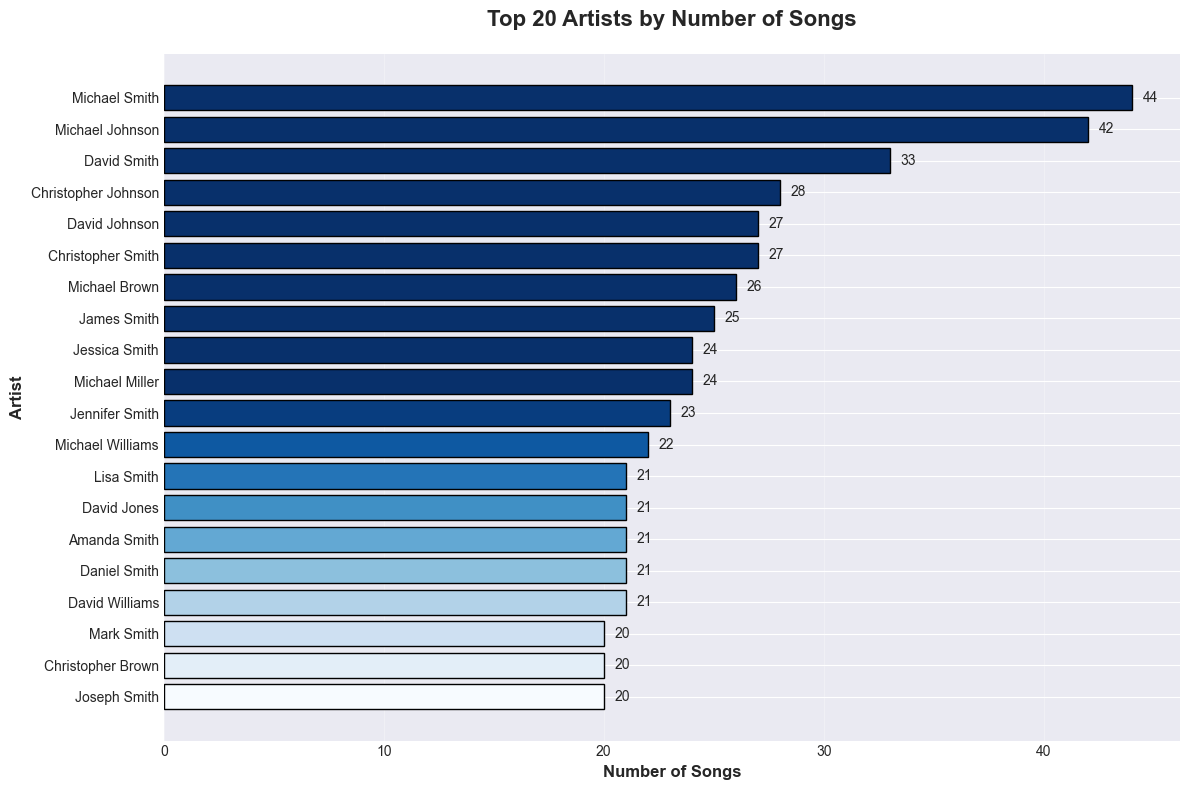

In [207]:
# Top artists by number of songs
plt.figure(figsize=(12, 8))
top_artists = df_clean['artist_name'].value_counts().head(20).sort_values(ascending=True)
# colors_genre = plt.cm.Blues(np.linspace(0.9, 0.3, len(genre_counts)))
colors = plt.cm.Blues(np.linspace(0, 2, len(top_artists)))
bars = plt.barh(range(len(top_artists)), top_artists.values, color=colors, edgecolor='black')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.xlabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Top 20 Artists by Number of Songs', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(top_artists)), top_artists.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_artists.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{count}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

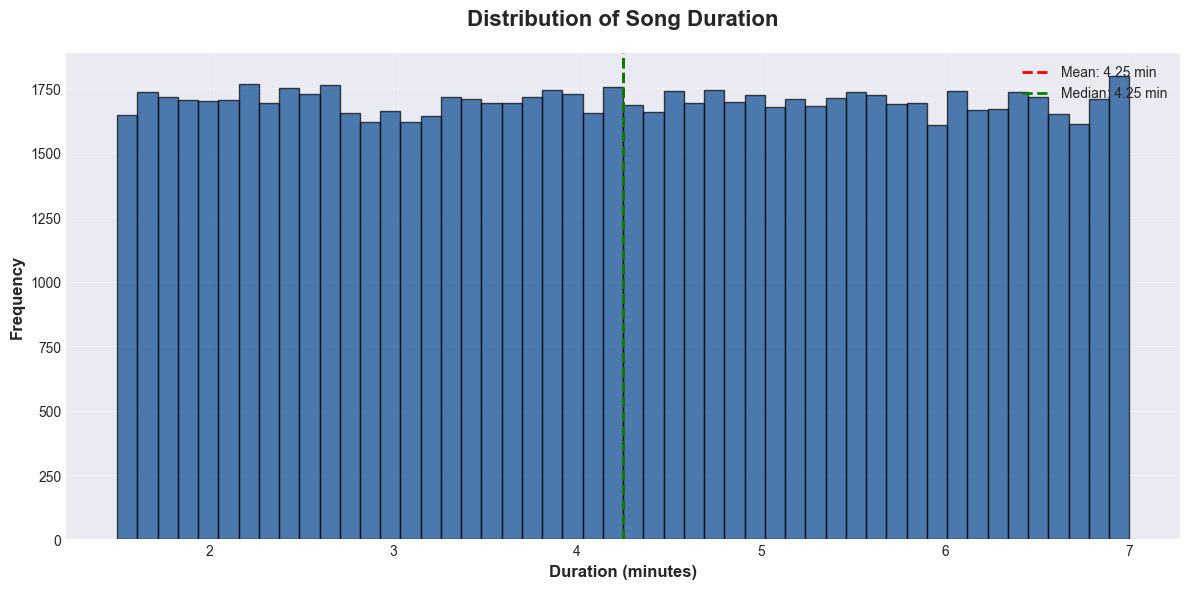


Duration Statistics:
Mean: 4.25 minutes
Median: 4.25 minutes
Min: 1.50 minutes
Max: 7.00 minutes


In [208]:
# Duration analysis
plt.figure(figsize=(12, 6))
plt.hist(df_clean['duration_min'], bins=50, edgecolor='black', alpha=0.7, color='#084A91')
plt.axvline(df_clean['duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["duration_min"].mean():.2f} min')
plt.axvline(df_clean['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["duration_min"].median():.2f} min')
plt.xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Song Duration', fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDuration Statistics:")
print(f"Mean: {df_clean['duration_min'].mean():.2f} minutes")
print(f"Median: {df_clean['duration_min'].median():.2f} minutes")
print(f"Min: {df_clean['duration_min'].min():.2f} minutes")
print(f"Max: {df_clean['duration_min'].max():.2f} minutes")

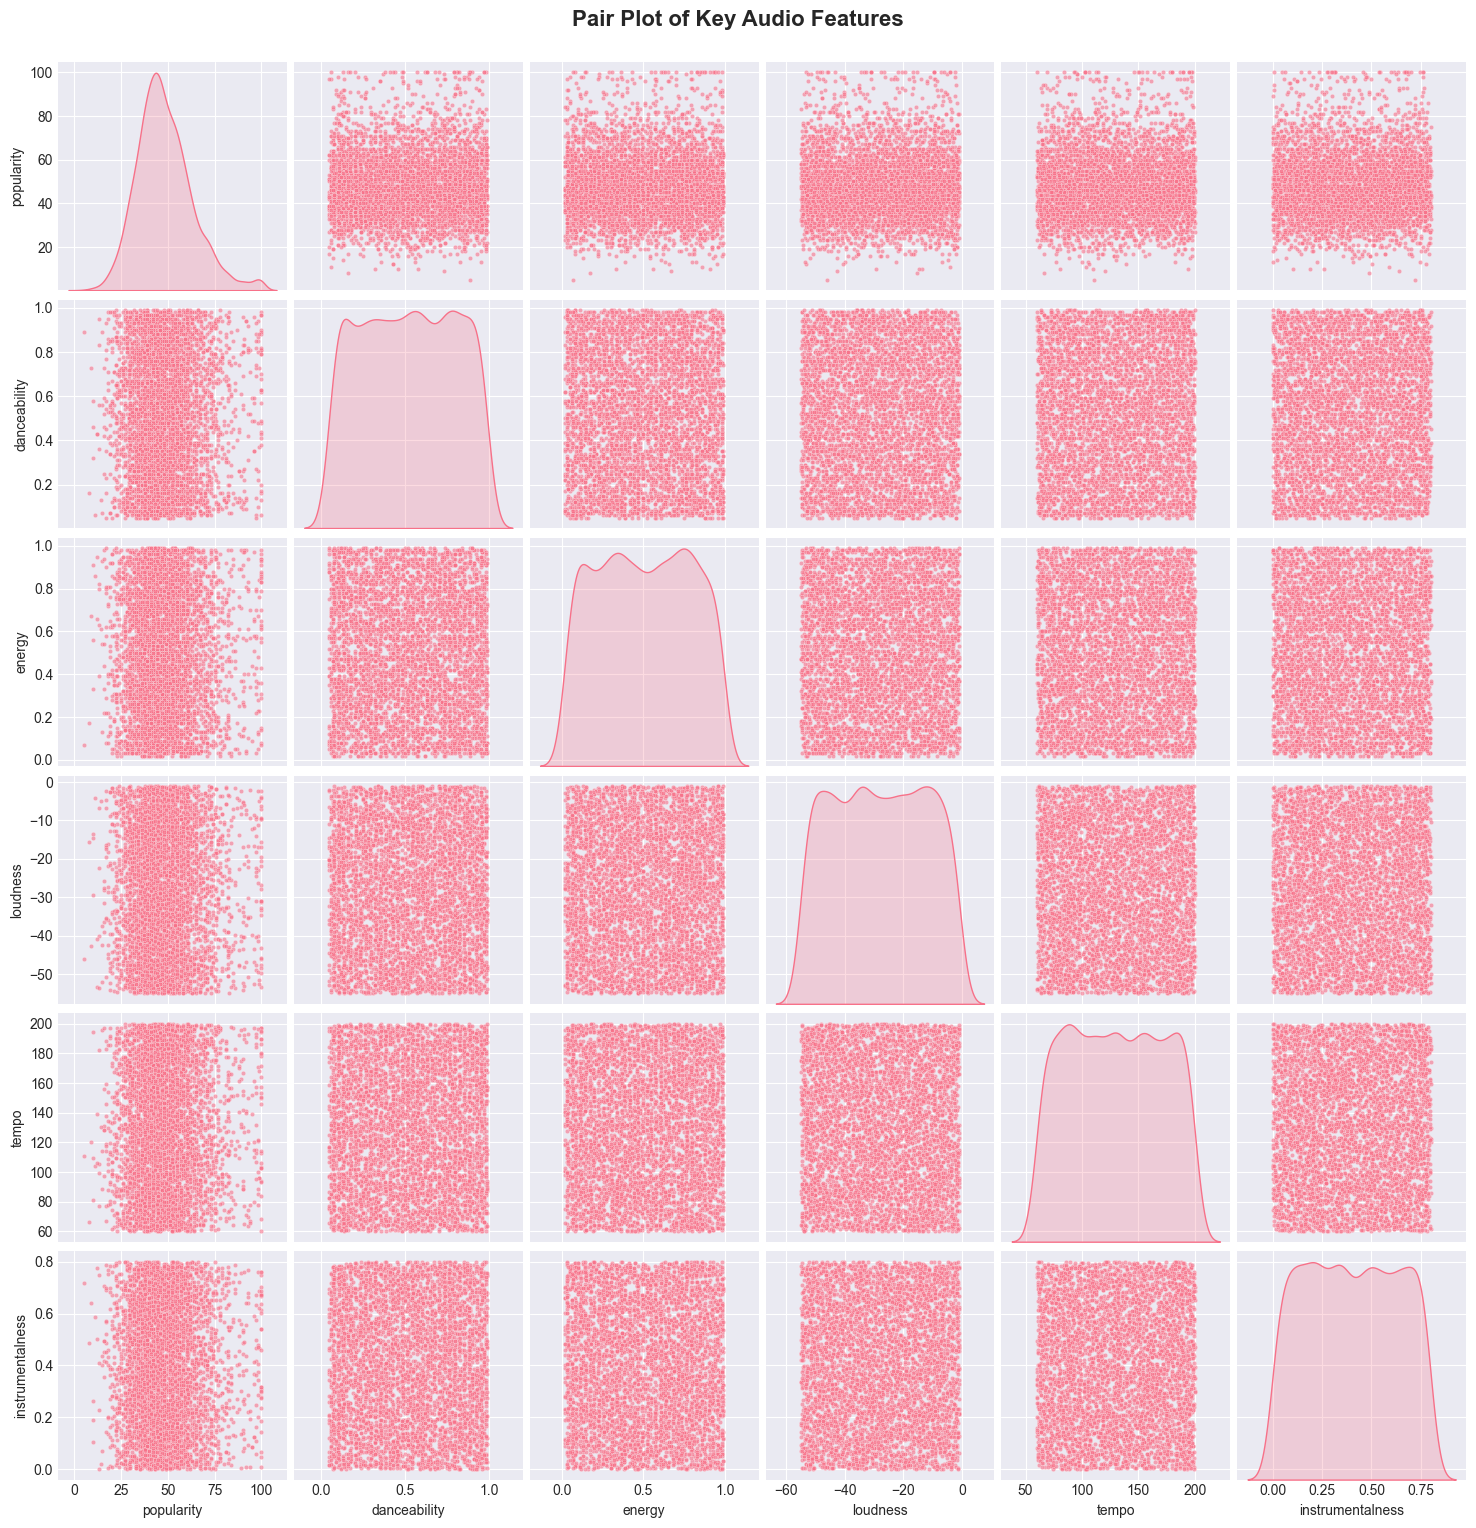

In [99]:
# Pair plot for key audio features
key_features = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
sample_df = df_clean[key_features].sample(n=5000, random_state=42)  # Sample for performance

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10})
g.fig.suptitle('Pair Plot of Key Audio Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

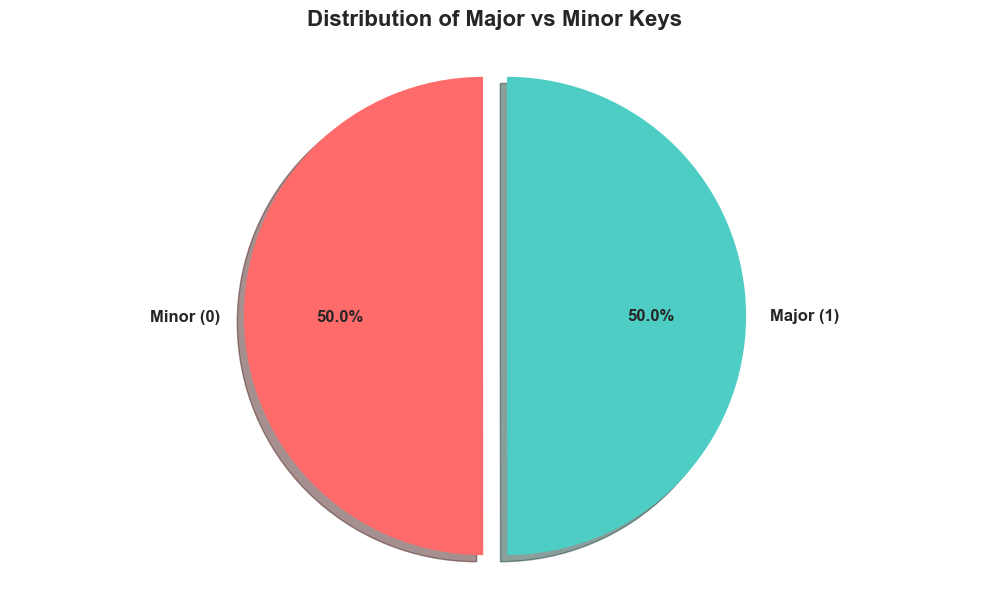


Major key songs: 42,512 (50.01%)
Minor key songs: 42,488 (49.99%)


In [100]:
# Mode distribution (Major vs Minor)
plt.figure(figsize=(10, 6))
mode_counts = df_clean['mode'].value_counts()
labels = ['Minor (0)', 'Major (1)']
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.05, 0.05)

plt.pie(mode_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Major vs Minor Keys', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nMajor key songs: {mode_counts[1]:,} ({(mode_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Minor key songs: {mode_counts[0]:,} ({(mode_counts[0]/len(df_clean)*100):.2f}%)")

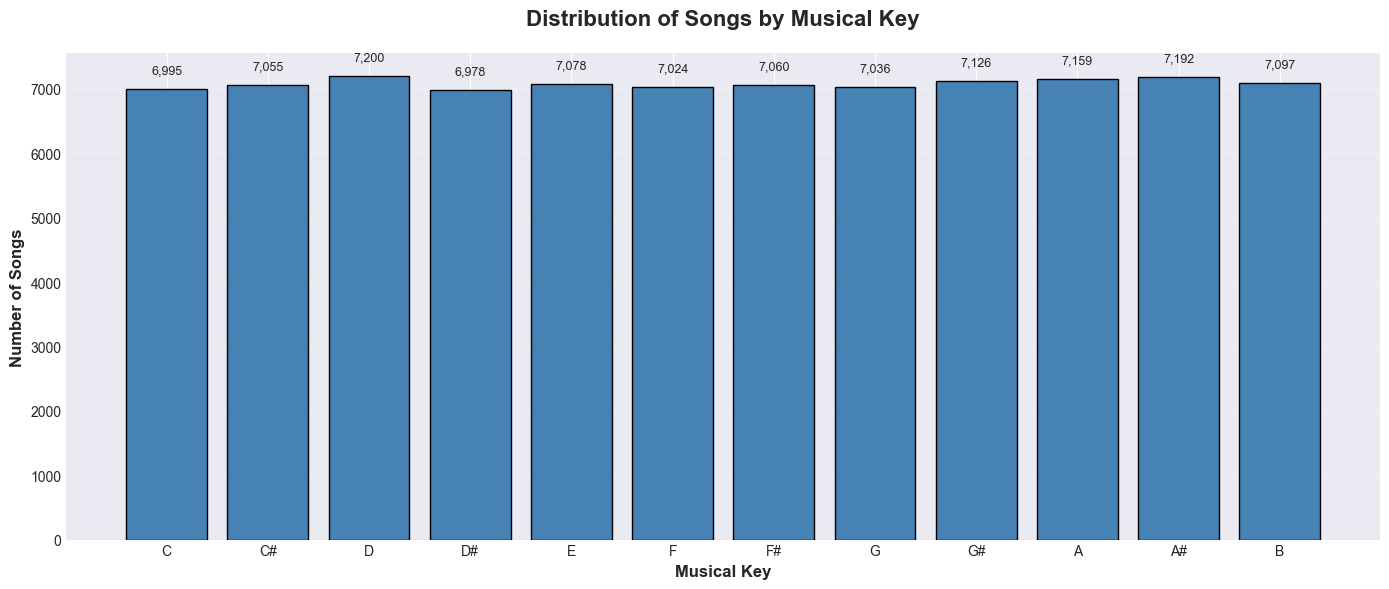

In [101]:
# Key distribution (musical keys 0-11)
plt.figure(figsize=(14, 6))
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_counts = df_clean['key'].value_counts().sort_index()
bars = plt.bar(range(len(key_counts)), key_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Musical Key', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Distribution of Songs by Musical Key', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(key_counts)), [key_names[i] for i in key_counts.index])
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, key_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# STATISTICAL ANALYSIS & INSIGHTS

In [102]:
# Statistical summary by genre
print("=" * 80)
print("STATISTICAL SUMMARY BY GENRE")
print("=" * 80)

stats_by_genre = df_clean.groupby('genre').agg({
    'popularity': ['mean', 'std', 'min', 'max'],
    'stream_count': ['mean', 'sum'],
    'danceability': 'mean',
    'energy': 'mean',
    'tempo': 'mean',
    'duration_min': 'mean'
}).round(2)

print(stats_by_genre)

STATISTICAL SUMMARY BY GENRE
          popularity                 stream_count             danceability  \
                mean    std min  max         mean         sum         mean   
genre                                                                        
Classical      48.36  14.83   8  100    217722.97  1558461000         0.52   
Country        48.17  14.85   6  100    204906.54  1440493000         0.53   
EDM            48.20  14.74   2  100    222381.20  1533096000         0.52   
Folk           48.10  14.97   6  100    217378.67  1539041000         0.52   
Hip-Hop        48.36  15.09   2  100    266307.54  1906762000         0.52   
Indie          48.12  14.58   5  100    179534.89  1258001000         0.52   
Jazz           47.85  14.64   6  100    201679.25  1447452000         0.52   
Metal          48.19  14.75   0  100    222916.39  1604998000         0.52   
Pop            48.37  15.00   7  100    216763.11  1538151000         0.52   
R&B            48.36  15.20   4  10

In [103]:
# Top songs by popularity
print("=" * 80)
print("TOP 10 SONGS BY POPULARITY")
print("=" * 80)
top_songs = df_clean.nlargest(10, 'popularity')[['track_name', 'artist_name', 'genre', 
                                                   'popularity', 'stream_count', 'danceability', 'energy']]
print(top_songs.to_string(index=False))

TOP 10 SONGS BY POPULARITY
                    track_name       artist_name     genre  popularity  stream_count  danceability  energy
   Good anything manager think     Julie Herrera   Hip-Hop         100      20000000          0.97    0.47
            Finally easy exist   Bonnie Roberson      Jazz         100       6555000          0.32    0.26
       Outside former official       Lisa Barnes     Metal         100      19380000          0.97    0.77
                            Of       David Rivas      Rock         100      20000000          0.17    0.22
                         Space     Joseph Duncan   Hip-Hop         100      20000000          0.13    0.07
                          Upon        Monica Kim       R&B         100      20000000          0.66    0.04
                Summer such PM     Brenda Wilson Classical         100      20000000          0.68    0.88
                  Although him   Samuel Cantrell Classical         100       1296000          0.67    0.12
          

In [104]:
# Top songs by stream count
print("=" * 80)
print("TOP 10 SONGS BY STREAM COUNT")
print("=" * 80)
top_streams = df_clean.nlargest(10, 'stream_count')[['track_name', 'artist_name', 'genre', 
                                                       'popularity', 'stream_count', 'danceability', 'energy']]
print(top_streams.to_string(index=False))

TOP 10 SONGS BY STREAM COUNT
                 track_name        artist_name     genre  popularity  stream_count  danceability  energy
Good anything manager think      Julie Herrera   Hip-Hop         100      20000000          0.97    0.47
                         Of        David Rivas      Rock         100      20000000          0.17    0.22
                      Throw      Brian Nichols       EDM          93      20000000          0.37    0.97
                      Space      Joseph Duncan   Hip-Hop         100      20000000          0.13    0.07
                       Upon         Monica Kim       R&B         100      20000000          0.66    0.04
     Team condition when if Roberto Williamson      Folk          75      20000000          0.45    0.80
              Leave outside      Kelsey Nguyen     Metal          89      20000000          0.60    0.21
            Admit why group    Justin Saunders     Metal          91      20000000          0.17    0.63
             Summer such P

In [105]:
# Analysis of audio features by genre
print("=" * 80)
print("AUDIO FEATURES ANALYSIS BY GENRE")
print("=" * 80)

audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
genre_audio = df_clean.groupby('genre')[audio_features].mean().round(3)

print("\nAverage Audio Features by Genre:")
print(genre_audio)

AUDIO FEATURES ANALYSIS BY GENRE

Average Audio Features by Genre:
           danceability  energy  loudness    tempo  instrumentalness
genre                                                               
Classical         0.520   0.508   -28.247  129.340             0.405
Country           0.526   0.505   -27.995  130.743             0.400
EDM               0.520   0.510   -27.829  129.174             0.401
Folk              0.518   0.505   -27.981  130.145             0.404
Hip-Hop           0.521   0.505   -28.054  130.267             0.395
Indie             0.521   0.510   -28.004  130.091             0.402
Jazz              0.519   0.498   -27.882  129.419             0.396
Metal             0.517   0.504   -27.846  129.626             0.398
Pop               0.519   0.503   -27.972  130.760             0.396
R&B               0.520   0.505   -28.094  130.250             0.405
Reggaeton         0.522   0.506   -27.942  130.052             0.401
Rock              0.526   0.506   -2

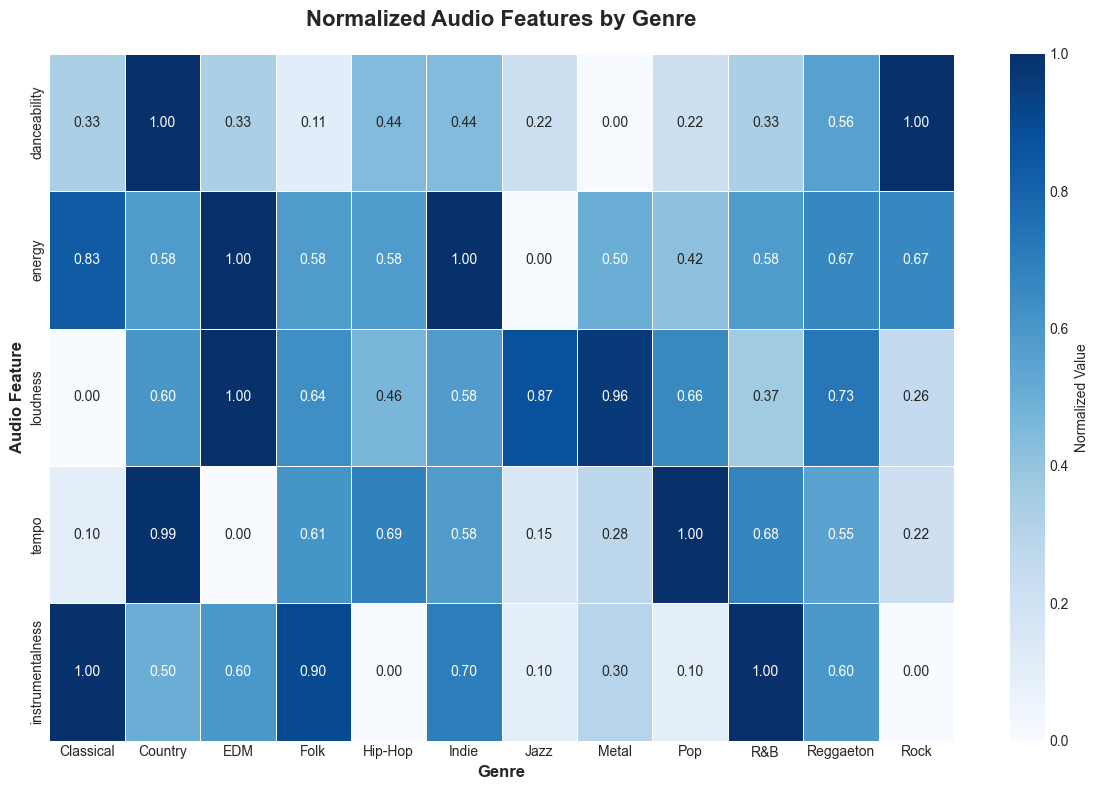

In [209]:
# Heatmap of audio features by genre
plt.figure(figsize=(12, 8))
genre_audio_normalized = genre_audio.copy()
# Normalize each feature to 0-1 scale for better visualization
for col in genre_audio_normalized.columns:
    genre_audio_normalized[col] = (genre_audio_normalized[col] - genre_audio_normalized[col].min()) / \
                                   (genre_audio_normalized[col].max() - genre_audio_normalized[col].min())

sns.heatmap(genre_audio_normalized.T, annot=True, fmt='.2f', cmap='Blues', 
            cbar_kws={'label': 'Normalized Value'}, linewidths=0.5)
plt.title('Normalized Audio Features by Genre', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Audio Feature', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

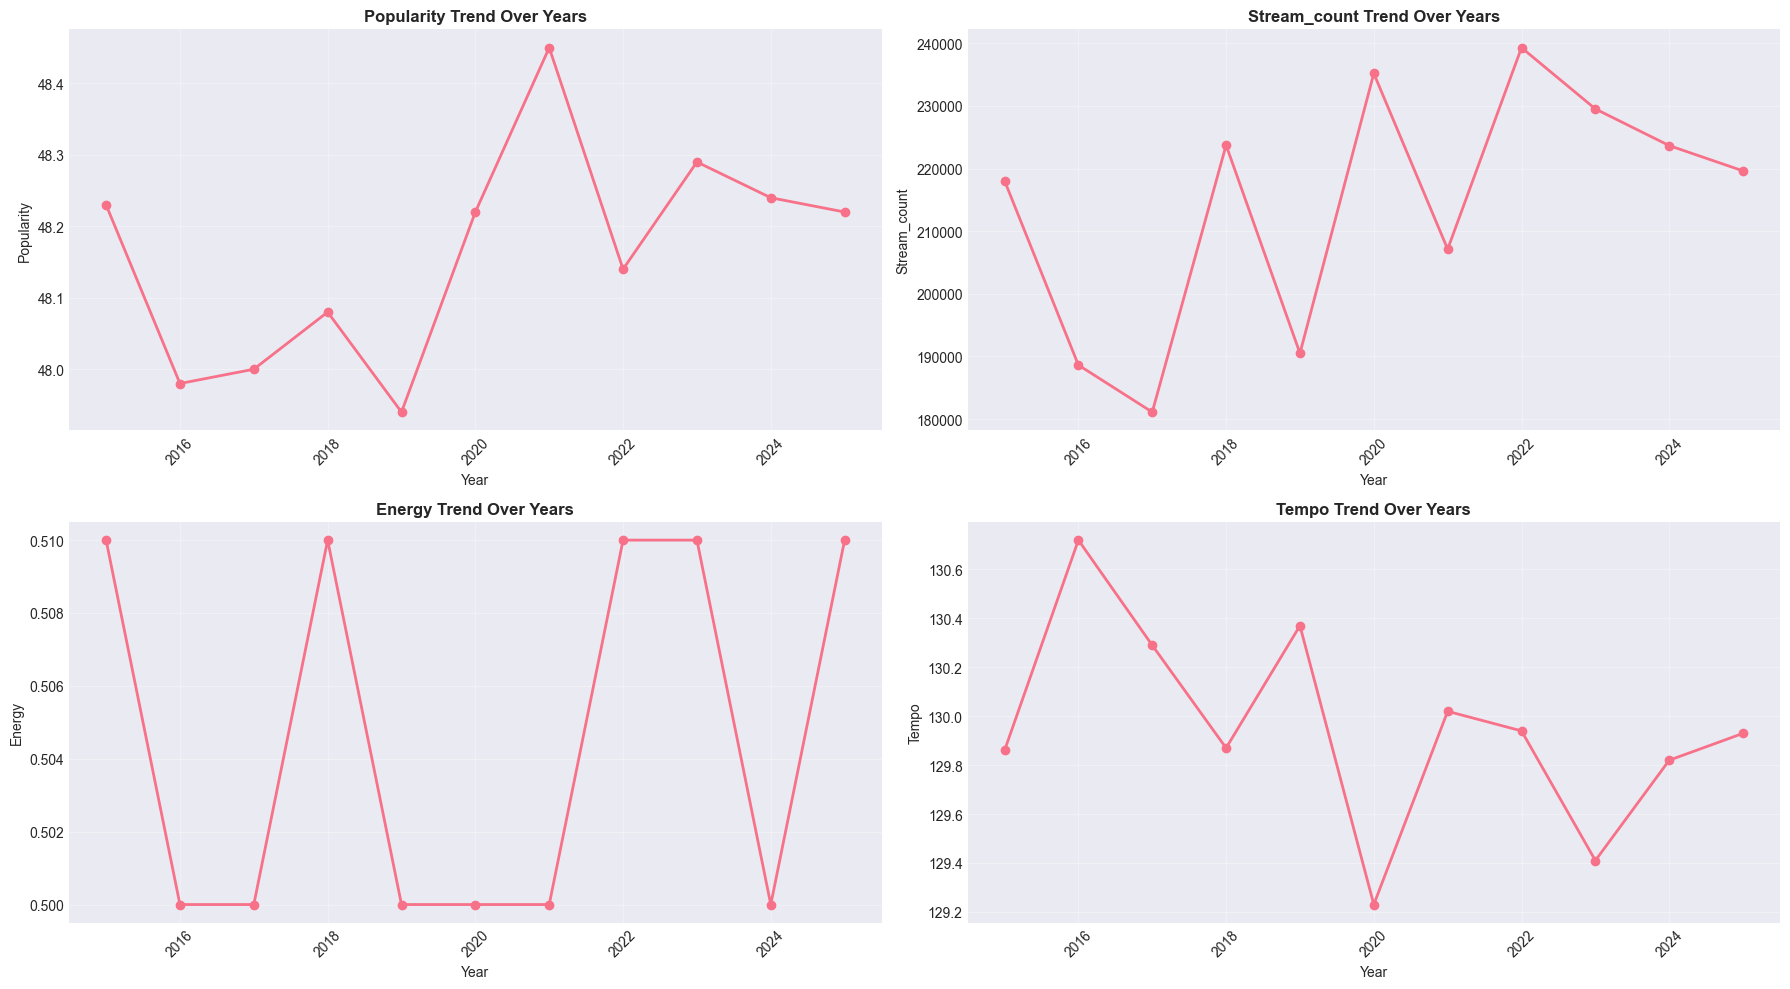

In [217]:
# Year-over-year trends
yearly_stats = df_clean.groupby('release_year').agg({
    'popularity': 'mean',
    'stream_count': 'mean',
    'energy': 'mean',
    'tempo': 'mean'
}).round(2)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.ravel()

metrics = ['popularity', 'stream_count', 'energy', 'tempo']
for idx, metric in enumerate(metrics):
    axes[idx].plot(yearly_stats.index, yearly_stats[metric], marker='o', linewidth=2, markersize=6)
    axes[idx].set_title(f'{metric.capitalize()} Trend Over Years', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplot
# fig.delaxes(axes[4])

plt.tight_layout()
plt.show()

TOP 15 COUNTRIES BY AVERAGE POPULARITY
country
United Kingdom    48.414401
Japan             48.350618
France            48.332983
Brazil            48.313545
Germany           48.074494
United States     48.062814
Canada            48.060093
Australia         48.052169
India             48.008344
Mexico            47.955505


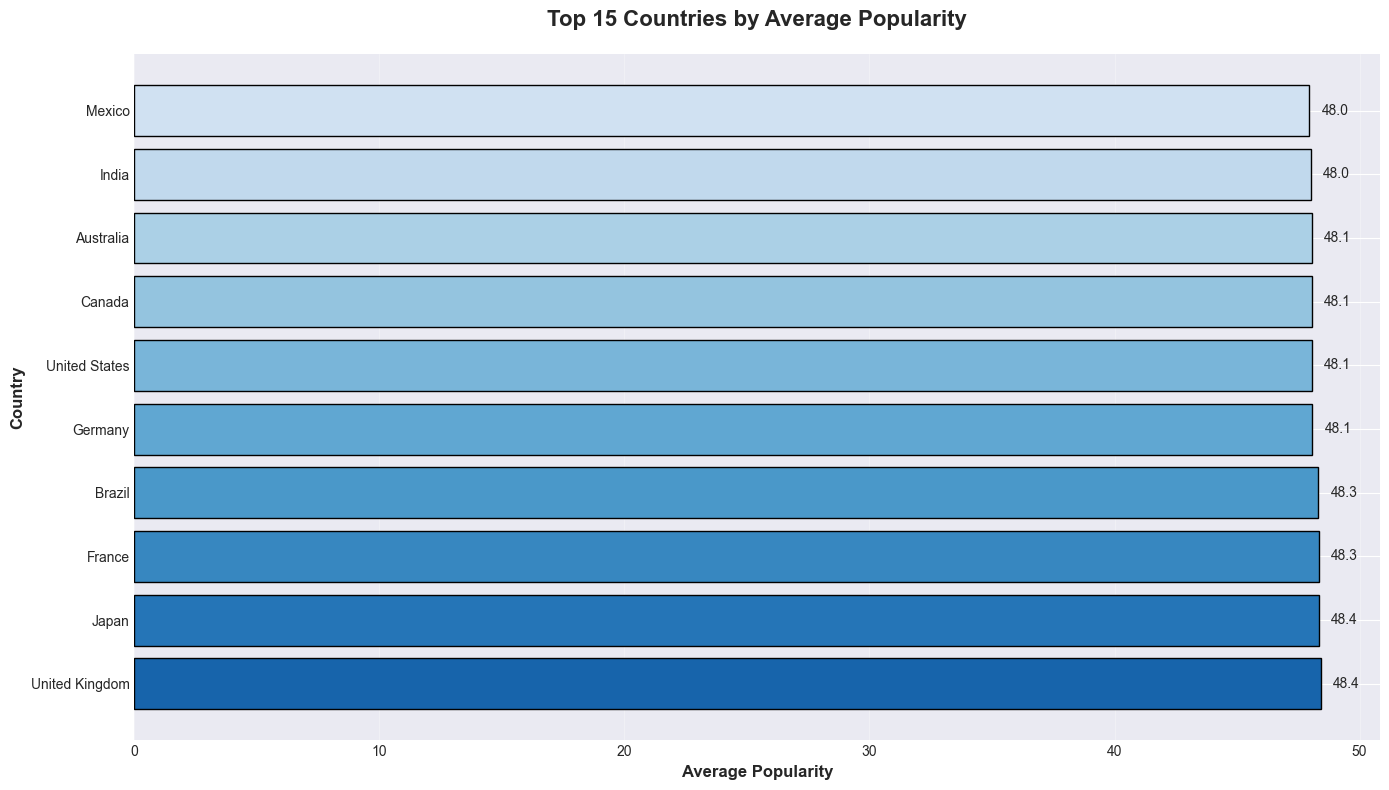

In [211]:
# Country analysis - Top countries by average popularity
print("=" * 80)
print("TOP 15 COUNTRIES BY AVERAGE POPULARITY")
print("=" * 80)
country_popularity = df_clean.groupby('country')['popularity'].mean().sort_values(ascending=False).head(15)
print(country_popularity.to_string())

plt.figure(figsize=(14, 8))
colors = plt.cm.Blues(np.linspace(0.8, 0.2, len(country_popularity)))
bars = plt.barh(range(len(country_popularity)), country_popularity.values, color=colors, edgecolor='black')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12, fontweight='bold')
plt.title('Top 15 Countries by Average Popularity', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(country_popularity)), country_popularity.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, country_popularity.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [109]:
# Record label analysis
print("=" * 80)
print("RECORD LABEL ANALYSIS")
print("=" * 80)
label_stats = df_clean.groupby('label').agg({
    'popularity': 'mean',
    'stream_count': ['mean', 'sum'],
    'track_id': 'count'
}).round(2)
label_stats.columns = ['Avg_Popularity', 'Avg_Streams', 'Total_Streams', 'Song_Count']
label_stats = label_stats.sort_values('Avg_Popularity', ascending=False)
print(label_stats.head(10))

RECORD LABEL ANALYSIS
                 Avg_Popularity  Avg_Streams  Total_Streams  Song_Count
label                                                                  
Sony Music                48.33    227709.15     2420776000       10631
EMI                       48.30    231833.84     2451411000       10574
Independent               48.26    221386.64     2383670000       10767
XL Recordings             48.21    196843.36     2103665000       10687
Universal Music           48.20    216704.24     2276478000       10505
Columbia                  48.09    202284.85     2162425000       10690
Island Records            48.00    207040.37     2179514000       10527
Warner Music              47.90    211150.67     2242209000       10619


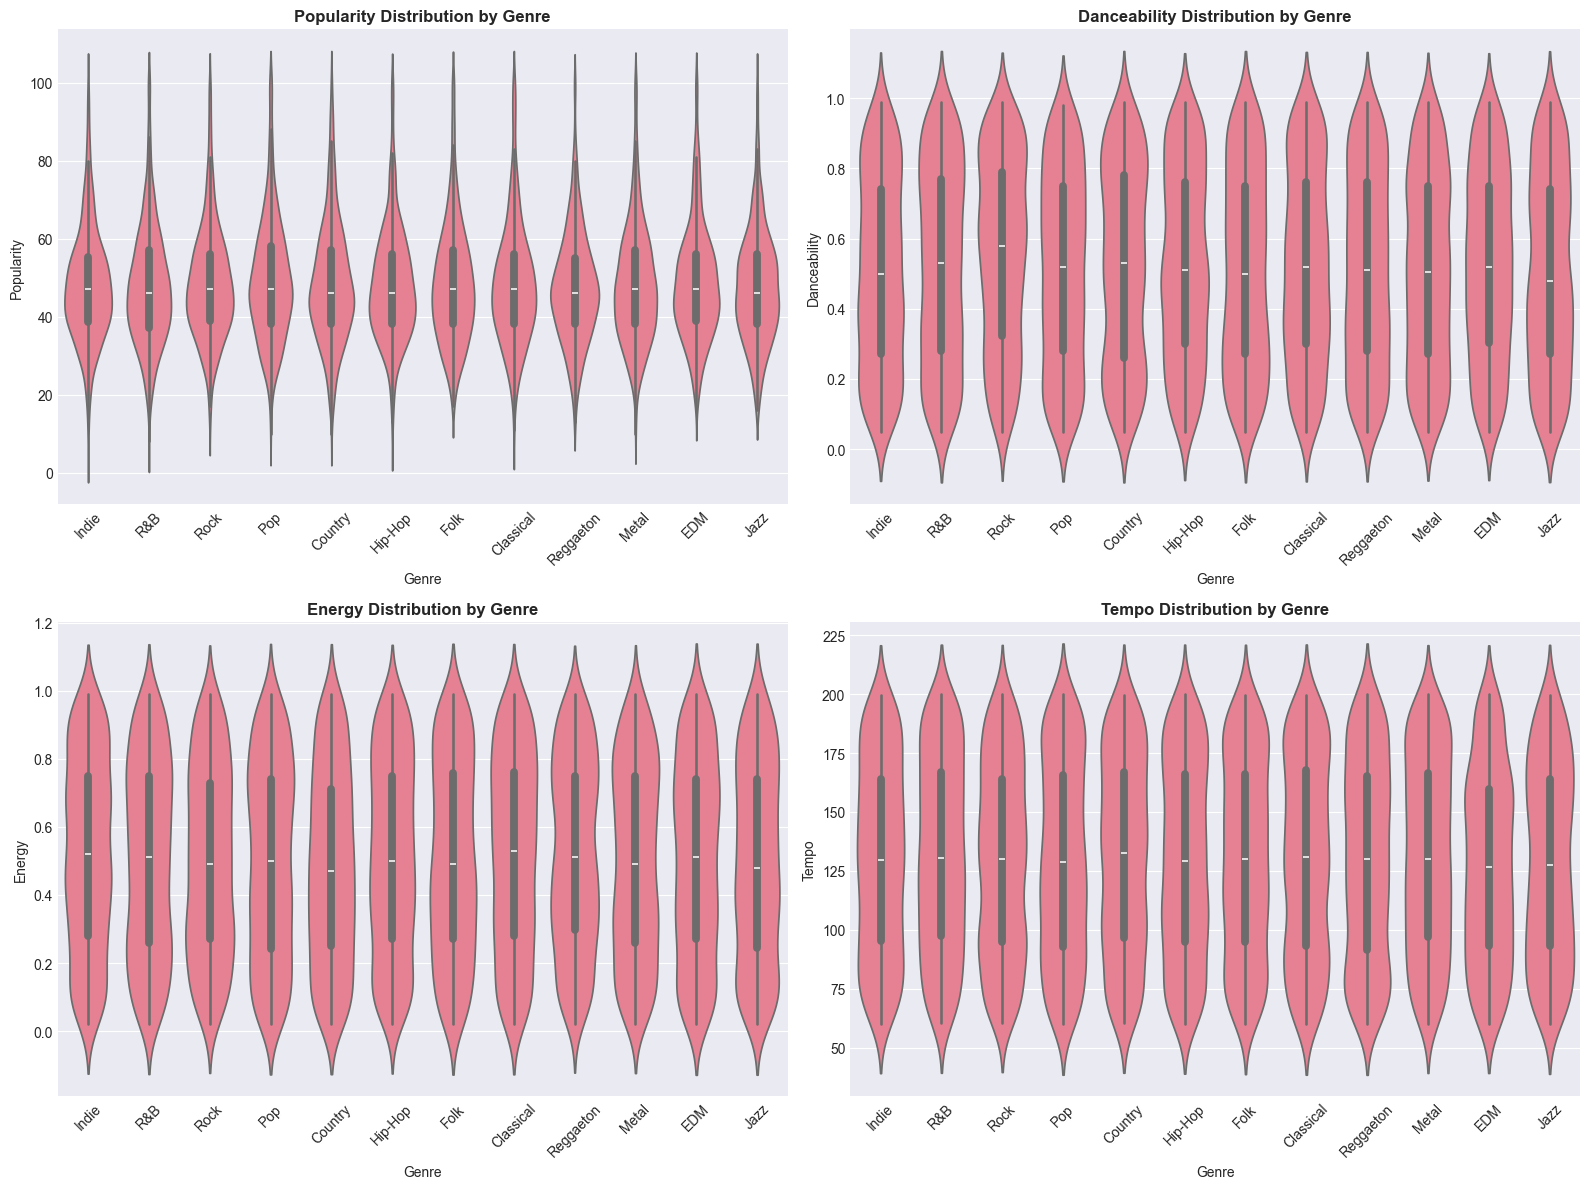

In [110]:
# Violin plots for key features by genre
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features_to_plot = ['popularity', 'danceability', 'energy', 'tempo']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    # Sample data for better performance
    sample_data = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)
    sns.violinplot(data=sample_data, x='genre', y=feature, ax=ax)
    ax.set_title(f'{feature.capitalize()} Distribution by Genre', fontsize=12, fontweight='bold')
    ax.set_xlabel('Genre', fontsize=10)
    ax.set_ylabel(feature.capitalize(), fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# KEY INSIGHTS & PATTERNS

In [111]:
# Generate comprehensive insights
print("=" * 80)
print("KEY INSIGHTS FROM THE SPOTIFY DATASET")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total songs: {len(df_clean):,}")
print(f"   - Unique artists: {df_clean['artist_name'].nunique():,}")
print(f"   - Unique genres: {df_clean['genre'].nunique()}")
print(f"   - Date range: {df_clean['release_date'].min().date()} to {df_clean['release_date'].max().date()}")

print("\n2. POPULARITY INSIGHTS:")
print(f"   - Average popularity: {df_clean['popularity'].mean():.2f}")
print(f"   - Most popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmax()}")
print(f"   - Least popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmin()}")

print("\n3. STREAMING INSIGHTS:")
print(f"   - Total streams: {df_clean['stream_count'].sum():,}")
print(f"   - Average streams per song: {df_clean['stream_count'].mean():,.0f}")
print(f"   - Genre with most streams: {df_clean.groupby('genre')['stream_count'].sum().idxmax()}")

print("\n4. AUDIO FEATURES:")
print(f"   - Average danceability: {df_clean['danceability'].mean():.3f}")
print(f"   - Average energy: {df_clean['energy'].mean():.3f}")
print(f"   - Average tempo: {df_clean['tempo'].mean():.1f} BPM")
print(f"   - Most danceable genre: {df_clean.groupby('genre')['danceability'].mean().idxmax()}")
print(f"   - Most energetic genre: {df_clean.groupby('genre')['energy'].mean().idxmax()}")

print("\n5. CONTENT ANALYSIS:")
explicit_pct = (df_clean['explicit'].sum() / len(df_clean)) * 100
print(f"   - Explicit content: {explicit_pct:.1f}%")
major_pct = (df_clean['mode'].sum() / len(df_clean)) * 100
print(f"   - Major key songs: {major_pct:.1f}%")

print("\n6. GEOGRAPHIC DISTRIBUTION:")
print(f"   - Countries represented: {df_clean['country'].nunique()}")
print(f"   - Top country by song count: {df_clean['country'].value_counts().index[0]}")

print("\n7. TEMPORAL TRENDS:")
year_with_most_songs = df_clean['release_year'].value_counts().index[0]
print(f"   - Year with most releases: {int(year_with_most_songs)}")
print(f"   - Average popularity trend: ", end="")
recent_years = df_clean[df_clean['release_year'] >= 2020]['popularity'].mean()
older_years = df_clean[df_clean['release_year'] < 2020]['popularity'].mean()
if recent_years > older_years:
    print(f"Increasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")
else:
    print(f"Decreasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")

print("\n8. CORRELATIONS:")
corr_pop_stream = df_clean['popularity'].corr(df_clean['stream_count'])
corr_dance_energy = df_clean['danceability'].corr(df_clean['energy'])
print(f"   - Popularity vs Stream Count: {corr_pop_stream:.3f}")
print(f"   - Danceability vs Energy: {corr_dance_energy:.3f}")

print("\n" + "=" * 80)

KEY INSIGHTS FROM THE SPOTIFY DATASET

1. DATASET OVERVIEW:
   - Total songs: 85,000
   - Unique artists: 62,391
   - Unique genres: 12
   - Date range: 2015-01-01 to 2025-12-31

2. POPULARITY INSIGHTS:
   - Average popularity: 48.16
   - Most popular genre: Pop
   - Least popular genre: Jazz

3. STREAMING INSIGHTS:
   - Total streams: 18,220,148,000
   - Average streams per song: 214,355
   - Genre with most streams: Hip-Hop

4. AUDIO FEATURES:
   - Average danceability: 0.521
   - Average energy: 0.505
   - Average tempo: 129.9 BPM
   - Most danceable genre: Rock
   - Most energetic genre: EDM

5. CONTENT ANALYSIS:
   - Explicit content: 20.1%
   - Major key songs: 50.0%

6. GEOGRAPHIC DISTRIBUTION:
   - Countries represented: 10
   - Top country by song count: India

7. TEMPORAL TRENDS:
   - Year with most releases: 2015
   - Average popularity trend: Increasing (Recent: 48.3 vs Older: 48.0)

8. CORRELATIONS:
   - Popularity vs Stream Count: 0.358
   - Danceability vs Energy: -0.004

In [112]:
# Final summary statistics
print("=" * 80)
print("FINAL SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Metric': ['Total Songs', 'Unique Artists', 'Unique Genres', 'Unique Countries', 
               'Unique Labels', 'Date Range (years)', 'Avg Popularity', 
               'Avg Stream Count', 'Avg Duration (min)', 'Avg Danceability', 
               'Avg Energy', 'Avg Tempo (BPM)'],
    'Value': [
        f"{len(df_clean):,}",
        f"{df_clean['artist_name'].nunique():,}",
        f"{df_clean['genre'].nunique()}",
        f"{df_clean['country'].nunique()}",
        f"{df_clean['label'].nunique()}",
        f"{(df_clean['release_date'].max() - df_clean['release_date'].min()).days / 365:.1f}",
        f"{df_clean['popularity'].mean():.2f}",
        f"{df_clean['stream_count'].mean():,.0f}",
        f"{df_clean['duration_min'].mean():.2f}",
        f"{df_clean['danceability'].mean():.3f}",
        f"{df_clean['energy'].mean():.3f}",
        f"{df_clean['tempo'].mean():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))
print("\n" + "=" * 80)

FINAL SUMMARY STATISTICS
            Metric   Value
       Total Songs  85,000
    Unique Artists  62,391
     Unique Genres      12
  Unique Countries      10
     Unique Labels       8
Date Range (years)    11.0
    Avg Popularity   48.16
  Avg Stream Count 214,355
Avg Duration (min)    4.25
  Avg Danceability   0.521
        Avg Energy   0.505
   Avg Tempo (BPM)   129.9



# Feature Engineering

In [218]:
# Generate popularity bins: low, medium, high
df_clean['popularity_bin'] = pd.cut(df_clean['popularity'], bins=[0, 30, 60, 100], labels=['low', 'medium', 'high'])
df_clean['popularity_bin'].value_counts()


popularity_bin
medium    61568
high      15345
low        8086
Name: count, dtype: int64

In [233]:
# Generate stream_category bins: low_stream, medium_stream, high_stream
df_clean['stream_category'] = pd.cut(df_clean['stream_count'], bins=[0, 7500000, 13000000, df_clean['stream_count'].max()], labels=['low_stream', 'medium_stream', 'high_stream'])
df_clean['stream_category'].value_counts()

stream_category
low_stream       84252
high_stream        580
medium_stream      168
Name: count, dtype: int64

In [234]:
# Normalize key values (0-11 represents musical keys)
key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
df_clean['key_label'] = df_clean['key'].map(lambda x: key_labels[int(x)] if 0 <= x <= 11 else 'Unknown')

GENRE SEPARATION ANALYSIS: UMAP vs t-SNE
Sample size: 10,000 songs
Audio features used: danceability, energy, key, loudness, mode, instrumentalness, tempo
Number of genres: 12

Computing dimensionality reduction...

1. Computing UMAP projection...
UMAP projection completed successfully!
2. Computing t-SNE projection (this may take a minute)...


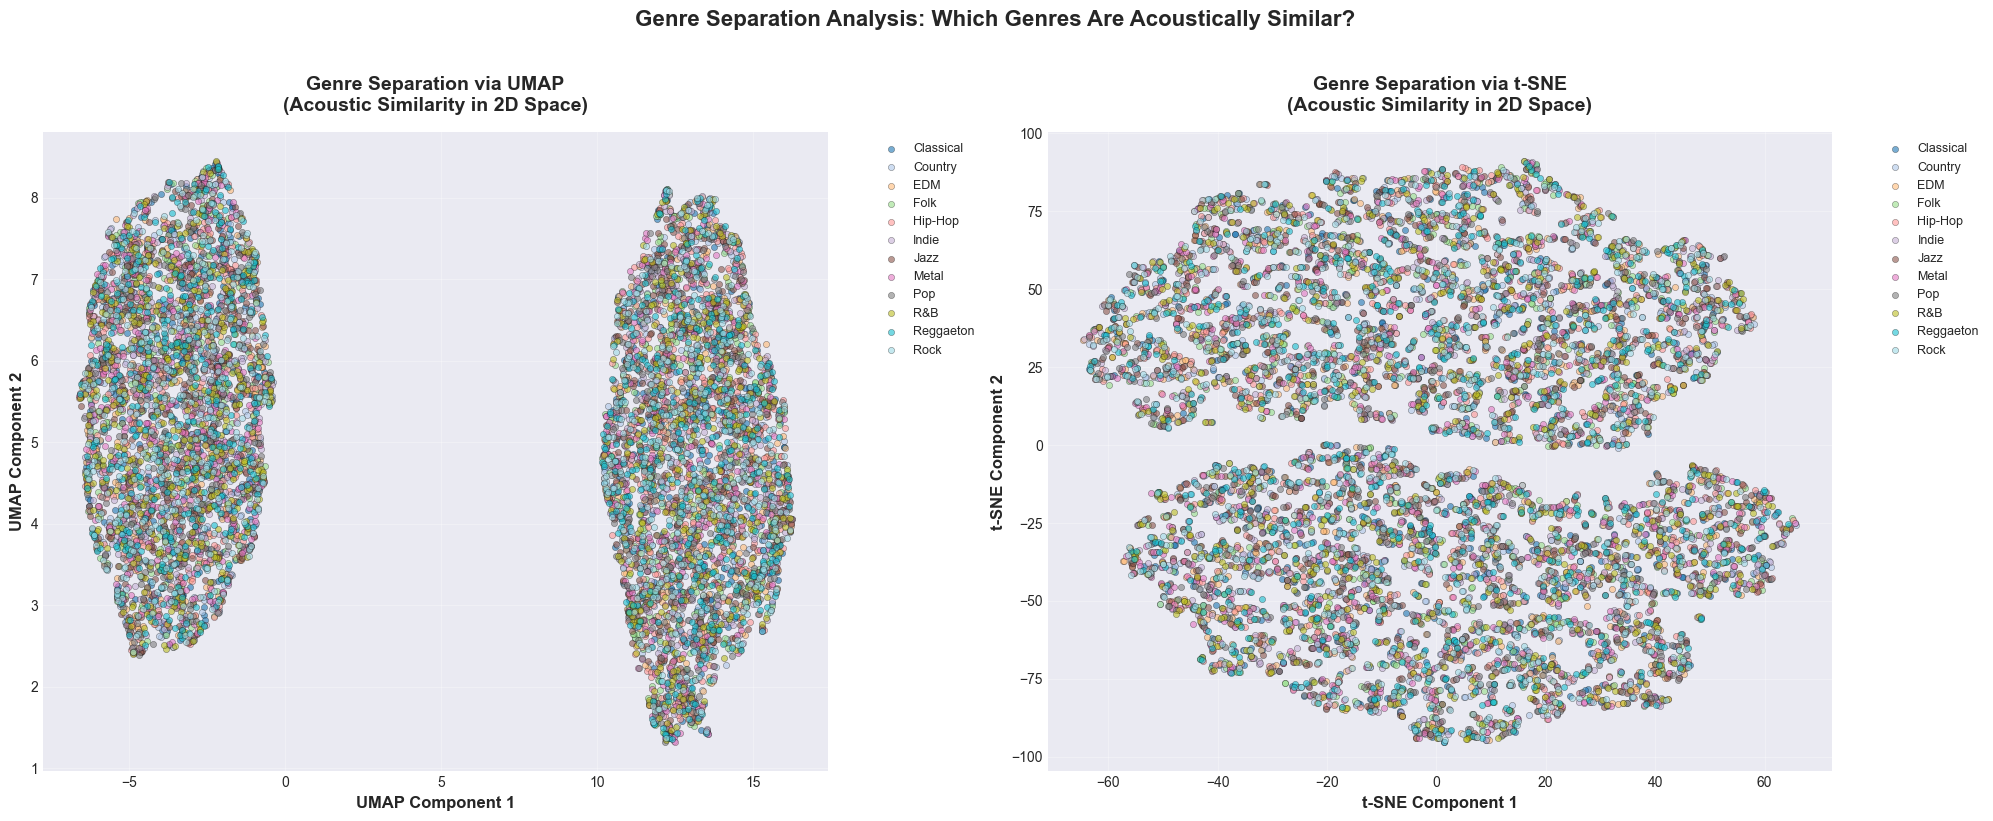


INTERPRETATION GUIDE

HOW TO READ THESE VISUALIZATIONS:

1. DISTINCT GENRES (Well-Separated Clusters):
   • Genres that form their own distinct clusters are acoustically unique
   • Example: Classical music often forms a separate cluster due to its 
     distinct instrumental characteristics

2. OVERLAPPING GENRES (Mixed Clusters):
   • Genres that overlap in the same region share similar audio features
   • Example: Pop and R&B often overlap because they share similar 
     danceability, energy, and tempo characteristics

3. WHAT TO LOOK FOR:
   • Tight clusters = Genres with consistent, distinct audio profiles
   • Scattered points = High variation within that genre
   • Overlapping regions = Genres that sound similar acoustically
   • Separate regions = Genres that are musically distinct

4. DIFFERENCES BETWEEN UMAP AND t-SNE:
   • UMAP: Better at preserving global structure, faster computation
   • t-SNE: Better at preserving local neighborhoods, more detailed clusters
   • Both m

In [239]:
# Genre Separation via UMAP/t-SNE: Audio Feature Dimensionality Reduction
# This visualization projects high-dimensional audio features into 2D space
# to show which genres are acoustically similar or distinct

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
try:
    import umap
except ImportError:
    print("UMAP not installed. Installing...")
    import subprocess
    subprocess.check_call(["pip", "install", "umap-learn"])
    import umap

# Select audio features for dimensionality reduction
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                 'instrumentalness', 'tempo']

# Prepare data - sample for performance (UMAP/t-SNE can be slow on large datasets)
sample_size = min(10000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

# Extract features and scale them
X = df_sample[audio_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure data is float32 and has no NaN/inf values (fixes compatibility issues)
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=1.0, neginf=-1.0)
X_scaled = X_scaled.astype(np.float32)

# Get genre labels for coloring
genres = df_sample['genre'].values

print("="*70)
print("GENRE SEPARATION ANALYSIS: UMAP vs t-SNE")
print("="*70)
print(f"Sample size: {sample_size:,} songs")
print(f"Audio features used: {', '.join(audio_features)}")
print(f"Number of genres: {len(df_sample['genre'].unique())}")
print("\nComputing dimensionality reduction...")

# OPTION 1: UMAP (Uniform Manifold Approximation and Projection)
print("\n1. Computing UMAP projection...")
umap_success = False
X_umap = None
try:
    # Try UMAP with compatibility fix
    import umap.umap_ as umap_module
    from sklearn.utils import check_array
    import inspect
    
    # Check if we need to patch check_array
    sig = inspect.signature(check_array)
    if 'ensure_all_finite' not in sig.parameters:
        # Patch umap's internal check_array to remove ensure_all_finite parameter
        original_check = umap_module.check_array
        def patched_check(*args, **kwargs):
            kwargs.pop('ensure_all_finite', None)
            return original_check(*args, **kwargs)
        umap_module.check_array = patched_check
    
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = umap_reducer.fit_transform(X_scaled)
    umap_success = True
    print("UMAP projection completed successfully!")
except Exception as e:
    print(f"UMAP failed: {e}")
    print("Falling back to t-SNE only visualization...")
    umap_success = False
    X_umap = None

# Create figure with subplots (adjust based on UMAP success)
if umap_success:
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
else:
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    axes = [axes]  # Make it a list for consistent indexing

# Plot UMAP (if successful)
unique_genres = sorted(df_sample['genre'].unique())
colors_map = plt.cm.tab20(np.linspace(0, 1, len(unique_genres)))

if umap_success:
    ax1 = axes[0]
    for i, genre in enumerate(unique_genres):
        mask = genres == genre
        ax1.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                   c=[colors_map[i]], label=genre, alpha=0.6, s=20, edgecolors='black', linewidth=0.3)

    ax1.set_xlabel('UMAP Component 1', fontsize=12, fontweight='bold')
    ax1.set_ylabel('UMAP Component 2', fontsize=12, fontweight='bold')
    ax1.set_title('Genre Separation via UMAP\n(Acoustic Similarity in 2D Space)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
    ax1.grid(True, alpha=0.3)

# OPTION 2: t-SNE (t-Distributed Stochastic Neighbor Embedding)
print("2. Computing t-SNE projection (this may take a minute)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
ax2_idx = 1 if umap_success else 0
ax2 = axes[ax2_idx]
for i, genre in enumerate(unique_genres):
    mask = genres == genre
    ax2.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               c=[colors_map[i]], label=genre, alpha=0.6, s=20, edgecolors='black', linewidth=0.3)

ax2.set_xlabel('t-SNE Component 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('t-SNE Component 2', fontsize=12, fontweight='bold')
ax2.set_title('Genre Separation via t-SNE\n(Acoustic Similarity in 2D Space)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
ax2.grid(True, alpha=0.3)

plt.suptitle('Genre Separation Analysis: Which Genres Are Acoustically Similar?', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION GUIDE")
print("="*70)
print("""
HOW TO READ THESE VISUALIZATIONS:

1. DISTINCT GENRES (Well-Separated Clusters):
   • Genres that form their own distinct clusters are acoustically unique
   • Example: Classical music often forms a separate cluster due to its 
     distinct instrumental characteristics

2. OVERLAPPING GENRES (Mixed Clusters):
   • Genres that overlap in the same region share similar audio features
   • Example: Pop and R&B often overlap because they share similar 
     danceability, energy, and tempo characteristics

3. WHAT TO LOOK FOR:
   • Tight clusters = Genres with consistent, distinct audio profiles
   • Scattered points = High variation within that genre
   • Overlapping regions = Genres that sound similar acoustically
   • Separate regions = Genres that are musically distinct

4. DIFFERENCES BETWEEN UMAP AND t-SNE:
   • UMAP: Better at preserving global structure, faster computation
   • t-SNE: Better at preserving local neighborhoods, more detailed clusters
   • Both methods help identify which genres are "acoustically similar"

BOTTOM LINE:
These visualizations help you understand which genres share similar musical 
characteristics and which ones are truly distinct. This is useful for:
• Music recommendation systems
• Understanding genre boundaries
• Identifying hybrid or crossover genres
""")

In [236]:
df_clean['energy_danceability'] = df_clean['energy'] * df_clean['danceability']
df_clean['popularity_energy'] = (df_clean['popularity'] / 100) * df_clean['energy']
df_clean['instrumentalness_energy'] = df_clean['instrumentalness'] * df_clean['energy']

# Categorize musical modes (0 = minor, 1 = major)
df_clean['mode_label'] = df_clean['mode'].map({0: 'Minor', 1: 'Major'})

# Machine Learning: Popularity Prediction


In [255]:
# ============================================================================
# MACHINE LEARNING PIPELINE: POPULARITY PREDICTION
# ============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("MACHINE LEARNING: POPULARITY PREDICTION")
print("="*80)

# Step 1: Create a copy of df_clean
ml_df = df_clean.copy()
print(f"\n1. Created ml_df with shape: {ml_df.shape}")

# Step 2: Select features for training
# Numerical features (audio features that might predict popularity)
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                     'instrumentalness', 'tempo', 'duration_min', 'explicit']

# Categorical features
categorical_features = ['genre', 'country', 'label']

# Check if features exist and remove any that don't
available_numerical = [f for f in numerical_features if f in ml_df.columns]
available_categorical = [f for f in categorical_features if f in ml_df.columns]

print(f"\n2. Selected Features:")
print(f"   Numerical features ({len(available_numerical)}): {available_numerical}")
print(f"   Categorical features ({len(available_categorical)}): {available_categorical}")

# Step 3: Prepare target variable
target = 'popularity'
X = ml_df[available_numerical + available_categorical]
y = ml_df[target]

print(f"\n3. Target variable: {target}")
print(f"   Target range: {y.min():.1f} to {y.max():.1f}")
print(f"   Target mean: {y.mean():.2f}")

# # Step 4: Handle missing values
# print(f"\n4. Handling missing values...")
# print(f"   Missing values in features: {X.isnull().sum().sum()}")
# X = X.fillna(X.mode().iloc[0] if len(X.mode()) > 0 else 0)  # Fill with mode or 0

## Step 5: Encode categorical features (using One-Hot Encoding)
print(f"\n5. Encoding categorical features with One-Hot Encoding...")
X_encoded = X.copy()

# Store original column names before encoding
original_columns = X_encoded.columns.tolist()

# Separate numerical and categorical columns
X_numerical = X_encoded[available_numerical].copy()
X_categorical = X_encoded[available_categorical].copy()

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop=None)
X_categorical_encoded = ohe.fit_transform(X_categorical)

# Get feature names for encoded categorical columns
categorical_feature_names = ohe.get_feature_names_out(available_categorical)

# Combine numerical and encoded categorical features
X_encoded = pd.DataFrame(
    data=np.hstack([X_numerical.values, X_categorical_encoded]),
    columns=list(available_numerical) + list(categorical_feature_names),
    index=X_encoded.index
)
print(f"   Encoded '{col}': {X[col].nunique()} unique values")

# Step 6: Train-Test Split
print(f"\n6. Performing train-test split...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=None
)
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")

# Step 7: Scale numerical features
print(f"\n7. Scaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[available_numerical] = scaler.fit_transform(X_train[available_numerical])
X_test_scaled[available_numerical] = scaler.transform(X_test[available_numerical])

print(f"   Scaling completed for {len(available_numerical)} numerical features")

# Prepare feature names for later use
# feature_names = available_numerical + available_categorical
feature_names = X_encoded.columns.tolist()

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE")
print("="*80)

MACHINE LEARNING: POPULARITY PREDICTION

1. Created ml_df with shape: (85000, 29)

2. Selected Features:
   Numerical features (9): ['danceability', 'energy', 'key', 'loudness', 'mode', 'instrumentalness', 'tempo', 'duration_min', 'explicit']
   Categorical features (3): ['genre', 'country', 'label']

3. Target variable: popularity
   Target range: 0.0 to 100.0
   Target mean: 48.16

5. Encoding categorical features with One-Hot Encoding...
   Encoded 'instrumentalness': 801 unique values

6. Performing train-test split...
   Training set: 68,000 samples
   Test set: 17,000 samples

7. Scaling numerical features...
   Scaling completed for 9 numerical features

DATA PREPARATION COMPLETE


In [256]:
# Step 8: Train Multiple Models
print("="*80)
print("TRAINING MODELS")
print("="*80)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVR(kernel='rbf', C=1.0, gamma='scale'),
    # 'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Dictionary to store results
results = {}

print("\nTraining models...")
for name, model in models.items():
    print(f"\n  Training {name}...", end=" ")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }
    
    print(f"✓ (Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.2f})")

print("\n" + "="*80)
print("ALL MODELS TRAINED SUCCESSFULLY")
print("="*80)

TRAINING MODELS

Training models...

  Training Linear Regression... ✓ (Test R²: -0.0007, Test RMSE: 14.85)

  Training Ridge Regression... ✓ (Test R²: -0.0008, Test RMSE: 14.85)

  Training SVM... ✓ (Test R²: -0.0181, Test RMSE: 14.97)

ALL MODELS TRAINED SUCCESSFULLY


In [257]:
# Step 9: Display Results Table
print("="*80)
print("MODEL EVALUATION RESULTS")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()]
})

# Sort by Test R² (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

print("\nResults Summary (sorted by Test R²):")
print("-"*80)
print(results_df.to_string(index=False))
print("-"*80)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_test_r2 = results_df.iloc[0]['Test R²']
best_test_rmse = results_df.iloc[0]['Test RMSE']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {best_test_r2:.4f}")
print(f"   Test RMSE: {best_test_rmse:.2f}")

MODEL EVALUATION RESULTS

Results Summary (sorted by Test R²):
--------------------------------------------------------------------------------
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²   Test R²
Linear Regression   14.823235  14.845020  11.492865 11.503403  0.000527 -0.000746
 Ridge Regression   14.823116  14.845096  11.492771 11.503328  0.000543 -0.000757
              SVM   14.763479  14.973480  11.220235 11.473473  0.008569 -0.018141
--------------------------------------------------------------------------------

🏆 Best Model: Linear Regression
   Test R²: -0.0007
   Test RMSE: 14.85


In [ ]:
# Step 10: Feature Importance (for tree-based models)
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

feature_importance_dict = {}

# Get feature importance from tree-based models
for name, result in results.items():
    model = result['model']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_dict[name] = dict(zip(feature_names, importances))
        print(f"\n{name} - Top 5 Features:")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:20s}: {imp:.4f}")

# For Linear/Ridge models, use absolute coefficients as importance
for name, result in results.items():
    model = result['model']
    if hasattr(model, 'coef_'):
        coefs = np.abs(model.coef_)
        feature_importance_dict[name] = dict(zip(feature_names, coefs))
        print(f"\n{name} - Top 5 Features (by absolute coefficient):")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:20s}: {imp:.4f}")

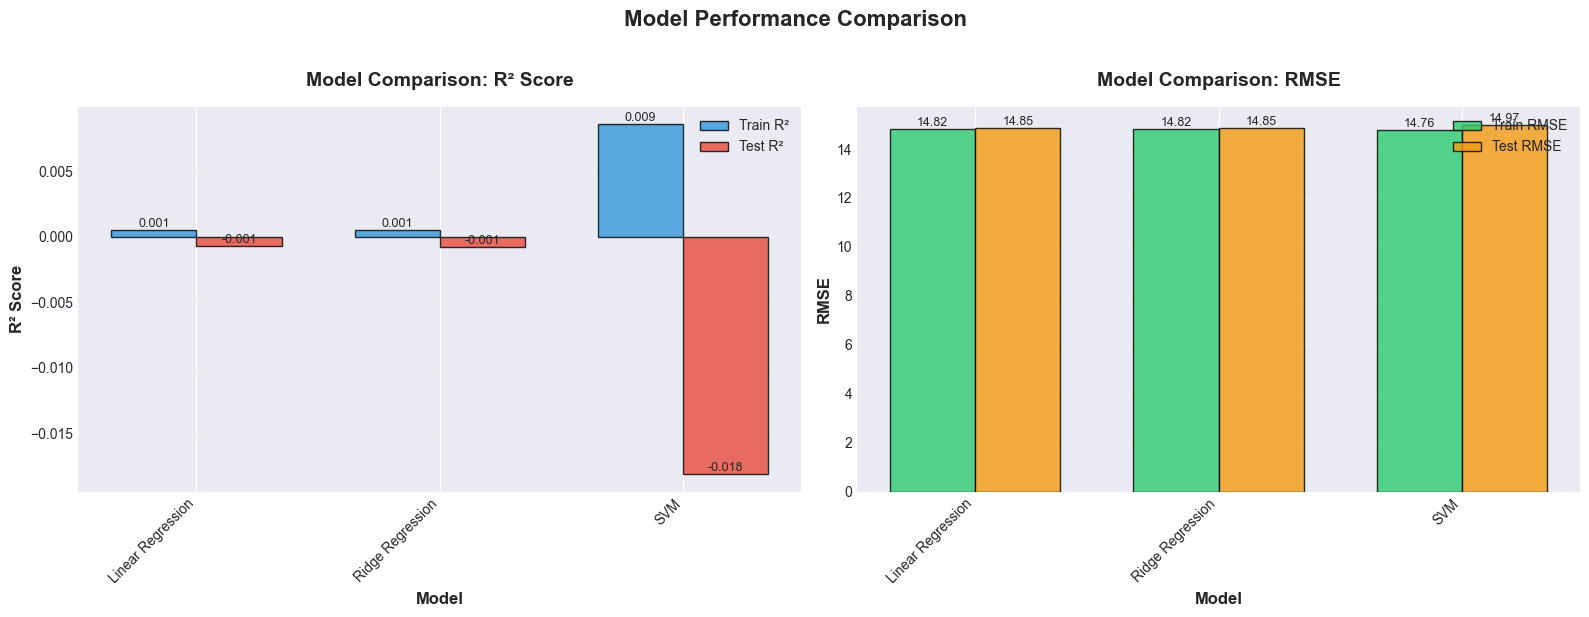

In [258]:
# Step 11: Visualizations

# 11.1: Model Comparison (R² and RMSE)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Comparison
ax1 = axes[0]
models_list = results_df['Model'].values
train_r2_values = results_df['Train R²'].values
test_r2_values = results_df['Test R²'].values

x_pos = np.arange(len(models_list))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_r2_values, width, label='Train R²', 
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, test_r2_values, width, label='Test R²', 
                color='#e74c3c', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: R² Score', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# RMSE Comparison
ax2 = axes[1]
train_rmse_values = results_df['Train RMSE'].values
test_rmse_values = results_df['Test RMSE'].values

bars3 = ax2.bar(x_pos - width/2, train_rmse_values, width, label='Train RMSE', 
                color='#2ecc71', alpha=0.8, edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, test_rmse_values, width, label='Test RMSE', 
                color='#f39c12', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: RMSE', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models_list, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# 11.2: Top 10 Feature Importance (for best tree-based model)
# Use Random Forest or Gradient Boosting for feature importance
tree_models = ['Random Forest', 'Gradient Boosting']
available_tree_model = None
for model_name in tree_models:
    if model_name in feature_importance_dict:
        available_tree_model = model_name
        break

if available_tree_model:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get top 10 features
    importances = feature_importance_dict[available_tree_model]
    sorted_features = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:10]
    features = [f[0] for f in sorted_features]
    importance_values = [f[1] for f in sorted_features]
    
    # Normalize importance values for better visualization
    max_imp = max(importance_values)
    normalized_imp = [v / max_imp for v in importance_values]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
    bars = ax.barh(range(len(features)), normalized_imp, color=colors, edgecolor='black')
    
    ax.set_yticks(range(len(features)))
    ax.set_yticklabels(features)
    ax.set_xlabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 10 Feature Importance: {available_tree_model}', 
                 fontsize=14, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val, orig_val) in enumerate(zip(bars, normalized_imp, importance_values)):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
               f'{orig_val:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No tree-based model available for feature importance visualization.")

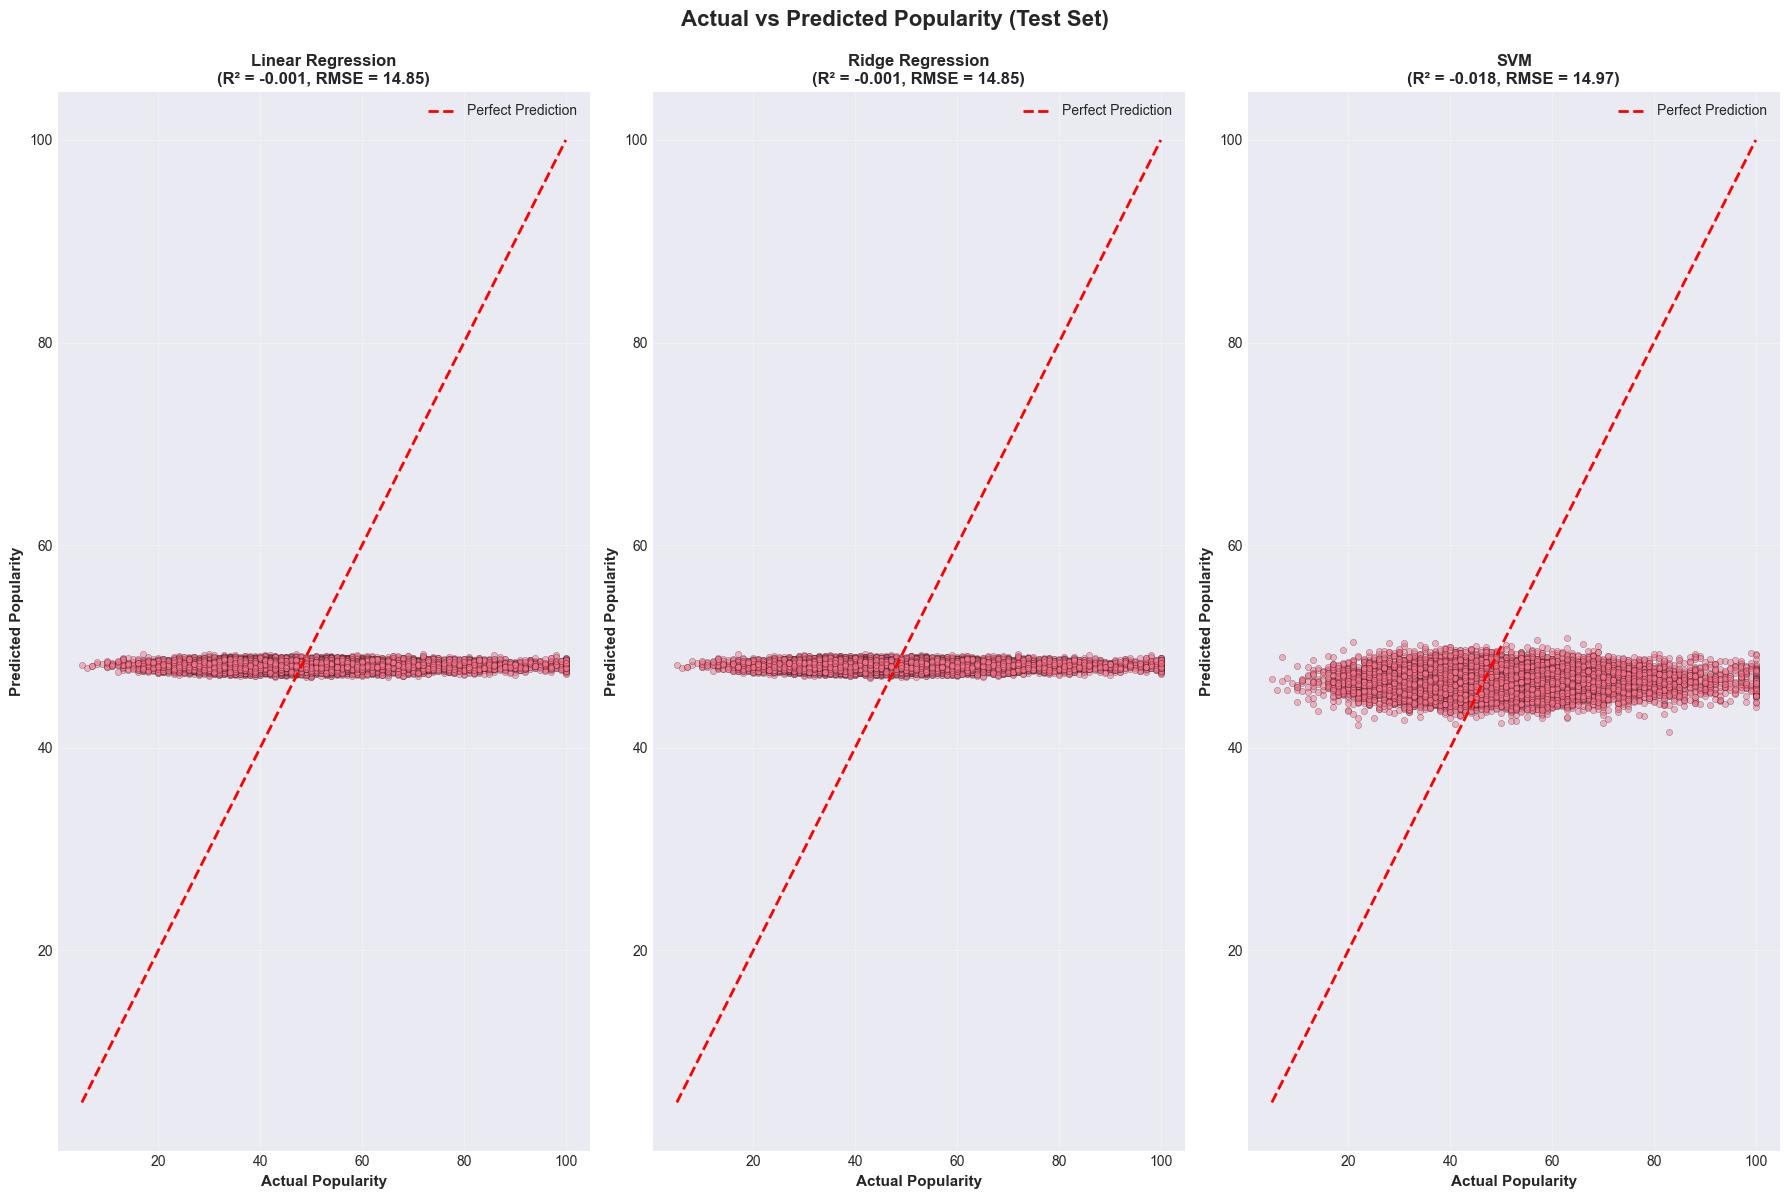

In [260]:
# 11.3: Actual vs Predicted Values (for all models)
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes = axes.ravel()

# Remove last subplot if we have 5 models
if len(models) == 5:
    fig.delaxes(axes[5])

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    
    # Use test set predictions
    y_actual = y_test.values
    y_pred = result['y_test_pred']
    
    # Scatter plot
    ax.scatter(y_actual, y_pred, alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
    
    # Perfect prediction line (y=x)
    min_val = min(y_actual.min(), y_pred.min())
    max_val = max(y_actual.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Labels and title
    ax.set_xlabel('Actual Popularity', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted Popularity', fontsize=11, fontweight='bold')
    ax.set_title(f'{name}\n(R² = {result["test_r2"]:.3f}, RMSE = {result["test_rmse"]:.2f})', 
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Actual vs Predicted Popularity (Test Set)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [261]:
# Step 12: Summary Statistics
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\nDataset Information:")
print(f"  Total samples: {len(ml_df):,}")
print(f"  Training samples: {len(X_train):,}")
print(f"  Test samples: {len(X_test):,}")
print(f"  Features used: {len(feature_names)}")

print(f"\nTarget Variable Statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.1f}")
print(f"  Max: {y.max():.1f}")

print(f"\nBest Model Performance ({best_model_name}):")
print(f"  Test R²: {best_test_r2:.4f}")
print(f"  Test RMSE: {best_test_rmse:.2f}")
print(f"  Test MAE: {results[best_model_name]['test_mae']:.2f}")

print("\n" + "="*80)
print("MACHINE LEARNING PIPELINE COMPLETE")
print("="*80)


FINAL SUMMARY

Dataset Information:
  Total samples: 85,000
  Training samples: 68,000
  Test samples: 17,000
  Features used: 39

Target Variable Statistics:
  Mean: 48.16
  Std: 14.83
  Min: 0.0
  Max: 100.0

Best Model Performance (Linear Regression):
  Test R²: -0.0007
  Test RMSE: 14.85
  Test MAE: 11.50

MACHINE LEARNING PIPELINE COMPLETE
